In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import string
import re
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

%matplotlib inline

In [5]:
final_data=pd.read_csv('data\\JTD_invoice_customer_join.csv')
final_data.head()

,Unnamed: 0,Unnamed: 0_x,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,...,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID,Business Partner,Partner Type,Data Origin,Title
0,0,0,22385,180,OSLCC_SRV31,Unknown,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,...,NO,0.0,AP28AY8040,laxminarayana,1869.87,BC04SA1,9969,6.0,NoCustomer,6.0
1,1,1,23910,10,1DM279018170117,Unknown,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,...,NO,0.0,MH12CD3403,SAJID,52351.48,BC02SA1,E26912,1.0,Z001,5.0
2,2,2,23910,40,1IS150203BE01,Unknown,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,...,NO,0.0,MH12CD3403,SAJID,52351.48,BC02SA1,E26912,1.0,Z001,5.0
3,3,3,23910,60,1DM279001990173,Unknown,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,...,NO,0.0,MH12CD3403,SAJID,52351.48,BC02SA1,E26912,1.0,Z001,5.0
4,4,4,23910,70,1DM88552790S001SA,Unknown,Engine Overhaul Kit -Indica Di,P002,1.0,EA,...,NO,0.0,MH12CD3403,SAJID,52351.48,BC02SA1,E26912,1.0,Z001,5.0


In [6]:
final_data.drop(columns=['Unnamed: 0','Unnamed: 0_x'],inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058847 entries, 0 to 3058846
Data columns (total 47 columns):
DBM Order               int64
Order Item              int64
Material                object
Labor Value Number      object
Description             object
Item Category           object
Order Quantity          float64
Target quantity UoM     object
Net value               float64
Unnamed: 0_y            int64
Amt Rcvd From Custom    float64
Amt Rcvd From Ins Co    float64
Area / Locality         float64
CITY                    object
Cash /Cashless Type     object
Cust Type               object
Customer No.            object
District                object
Gate Pass Date          object
Gate Pass Time          object
Invoice Date            object
Invoice No              int64
Invoice Time            object
Job Card No             int64
JobCard Date            object
JobCard Time            object
KMs Reading             int64
Labour Total            float64
Make               

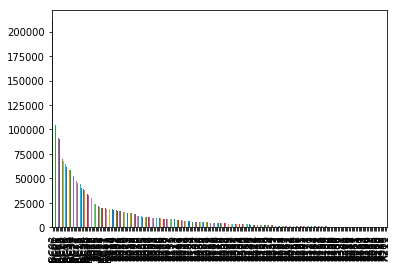

In [7]:
final_data['Plant'].value_counts().plot(kind='bar')

In [8]:
plant_master=pd.read_csv('data\\plant_master.csv')
plant_master

,Unnamed: 0,Plant,Name 1,Valuation Area,Customer no. - plant,Factory calendar,House number and street,Postal Code,City,Sales organization,State
0,0,BC07,NERKUNDRAM,BC07,PLBC07,IN,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,IN,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,IN,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,IN,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,IN,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka
5,5,X005,X005 - KLN MOTORS,X005,PLX005,IN,"No.8 (NP) Developed Plot,",600032,Chennai,MFCB,Tamil Nadu
6,6,X006,X006 - A.M.MOTORS,X006,PLX006,IN,"8, Mira, Behind Ajit Palace Ho",401104,Thane,MFCB,Maharashtra
7,7,X007,X007 - OM SRI SATYA SAI AUTOMO,X007,PLX007,IN,"Seegehalli main road,",560037,Bengaluru,MFCB,Karnataka
8,8,X008,X008- AAKASH AUTO (Puducherry),X008,PLX008,IN,"145/2, Villiyanur main road,",605110,Puducherry,MFCC,Puducherry
9,9,X010,X010 - LVM MOTORS,X010,PLX010,IN,"B- 49 Emerald Nagar, SIPCOT,",632406,Ranipet,MFCD,Tamil Nadu


In [9]:
plant_data= pd.DataFrame(final_data['Plant'].value_counts().sort_values(ascending=False).head(50).reset_index().values, columns=["Plant", "PlantCount"])
plant_data.head()

,Plant,PlantCount
0,BC03,211662
1,BC06,105868
2,BC01,104179
3,BC26,100383
4,BC05,91767


In [10]:
plant_master_data=pd.DataFrame(pd.merge(plant_data, plant_master, left_on='Plant', right_on='Plant',how='inner'))
plant_master_data.head()

,Plant,PlantCount,Unnamed: 0,Name 1,Valuation Area,Customer no. - plant,Factory calendar,House number and street,Postal Code,City,Sales organization,State
0,BC07,90132,0,NERKUNDRAM,BC07,PLBC07,IN,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,58386,1,SAS NAGAR - MOHALI,BC30,PLBC30,IN,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X006,31221,6,X006 - A.M.MOTORS,X006,PLX006,IN,"8, Mira, Behind Ajit Palace Ho",401104,Thane,MFCB,Maharashtra
3,X025,30255,22,X025 - SHIVALIK AUTOMOBILES,X025,PLX025,IN,"NH-95,",142001,Moga,MFCD,Punjab
4,X012,25577,11,X012 - SR CAR CARE,X012,PLX012,IN,"No 5, Bye Pass Road,",608001,Chidambaram,MFCD,Tamil Nadu


Text(0.5, 1.0, 'Jobs per top plant')

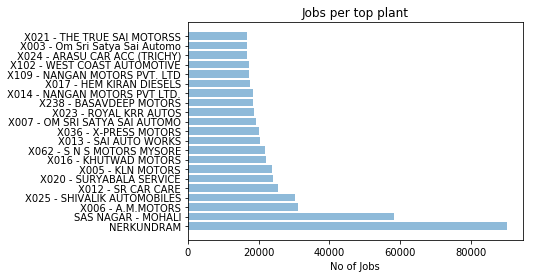

In [11]:
plt.barh(plant_master_data['Name 1'], plant_master_data['PlantCount'], align='center', alpha=0.5)
plt.xlabel('No of Jobs')
plt.title('Jobs per top plant')

Text(0.5, 1.0, 'Jobs per top City')

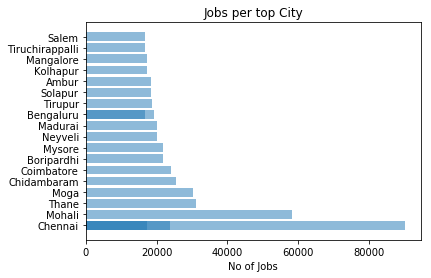

In [12]:
plt.barh(plant_master_data['City'], plant_master_data['PlantCount'], align='center', alpha=0.5)
plt.xlabel('No of Jobs')
plt.title('Jobs per top City')

In [13]:
final_data.groupby('Plant')['Technician Name'].nunique()

Plant
BC01     302
BC02     219
BC03    1528
BC04     178
BC05     422
BC06     469
BC07     307
BC08     291
BC11      11
BC12     205
BC13     494
BC15     474
BC16     173
BC17     547
BC18     231
BC19     378
BC20     429
BC21     102
BC22     262
BC23     285
BC24     357
BC25     298
BC26     282
BC27     295
BC28     544
BC29     297
BC30     136
BC31     364
BC32     217
BC33     119
        ... 
X324       1
X327       1
X328       1
X329       1
X331       1
X332       1
X334       1
X339       1
X341       1
X347       1
X350       1
X357       1
X359       1
X364       1
X366       1
X380       1
X384       1
X386       1
X392       1
X397       1
X401       1
X403       1
X405       1
X413       1
X418       1
X432       1
X435       1
X437       1
X444       1
X458       1
Name: Technician Name, Length: 242, dtype: int64

In [14]:
top_plant_tech=final_data[final_data['Plant']=='BC07']


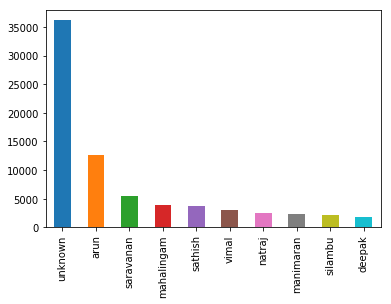

In [15]:
top_plant_tech['Technician Name'].str.lower().value_counts().head(10).plot(kind='bar')

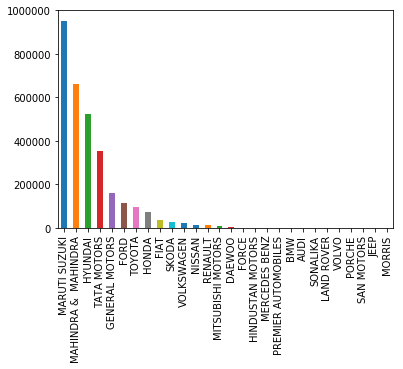

In [16]:
final_data['Make'].value_counts().plot(kind='bar')

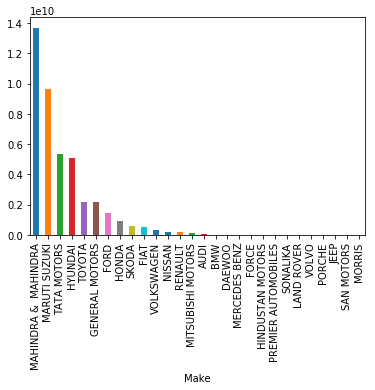

In [119]:
final_data.groupby('Make')['Total Amt Wtd Tax.'].sum().sort_values(ascending=False).plot(kind='bar')

In [18]:
final_data.groupby('Make')['KMs Reading','Model'].sum()

,KMs Reading
Make,
AUDI,34059111
BMW,33099539
DAEWOO,294484320
FIAT,2766267303
FORCE,86317757
FORD,8704931699
GENERAL MOTORS,11921169236
HINDUSTAN MOTORS,64924179
HONDA,5418606902


In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058847 entries, 0 to 3058846
Data columns (total 47 columns):
DBM Order               int64
Order Item              int64
Material                object
Labor Value Number      object
Description             object
Item Category           object
Order Quantity          float64
Target quantity UoM     object
Net value               float64
Unnamed: 0_y            int64
Amt Rcvd From Custom    float64
Amt Rcvd From Ins Co    float64
Area / Locality         float64
CITY                    object
Cash /Cashless Type     object
Cust Type               object
Customer No.            object
District                object
Gate Pass Date          object
Gate Pass Time          object
Invoice Date            object
Invoice No              int64
Invoice Time            object
Job Card No             int64
JobCard Date            object
JobCard Time            object
KMs Reading             int64
Labour Total            float64
Make               

In [20]:
final_data['JobCard Date'] =  pd.to_datetime(final_data['JobCard Date'], infer_datetime_format=True)

In [21]:
final_data.groupby(['Make','Material'])['DBM Order'].count().sort_values(ascending=False)

Make                  Material          
MARUTI SUZUKI         MARUTISUZUKI_SRV      161952
MAHINDRA &  MAHINDRA  MAHINDRA_SRV          119844
HYUNDAI               HYUNDAI_SRV            90080
TATA MOTORS           TATAMOTORS_SRV         70248
MARUTI SUZUKI         MISC_SRV07             36606
                      FFSOIL200901           34715
GENERAL MOTORS        GENERALMOTORS_SRV      30453
HYUNDAI               FFSOIL200901           23751
MAHINDRA &  MAHINDRA  MISC_SRV07             23674
FORD                  FORD_SRV               21892
HYUNDAI               MISC_SRV07             21611
MAHINDRA &  MAHINDRA  FFSOIL200901           20916
TOYOTA                TOYOTA_SRV             16124
HONDA                 HONDA_SRV              13167
TATA MOTORS           FFSOIL200901           12009
                      MISC_SRV07             11982
MARUTI SUZUKI         FFSCO230                9807
                      ACCT_SRV                9573
GENERAL MOTORS        MISC_SRV07         

In [22]:
make_material=pd.DataFrame(final_data.groupby(['Make','Material'])['DBM Order'].count().sort_values(ascending=False))
make_material.head()

,,DBM Order
Make,Material,
MARUTI SUZUKI,MARUTISUZUKI_SRV,161952
MAHINDRA & MAHINDRA,MAHINDRA_SRV,119844
HYUNDAI,HYUNDAI_SRV,90080
TATA MOTORS,TATAMOTORS_SRV,70248
MARUTI SUZUKI,MISC_SRV07,36606


In [23]:
cat_cols = [ 'Item Category','Target quantity UoM','Cash /Cashless Type', 'Cust Type']

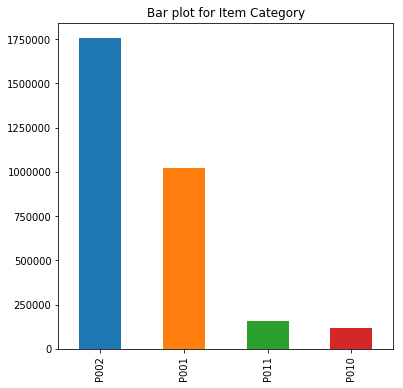

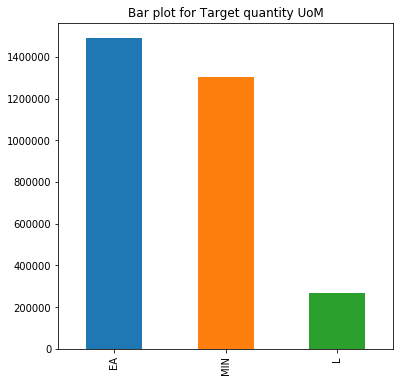

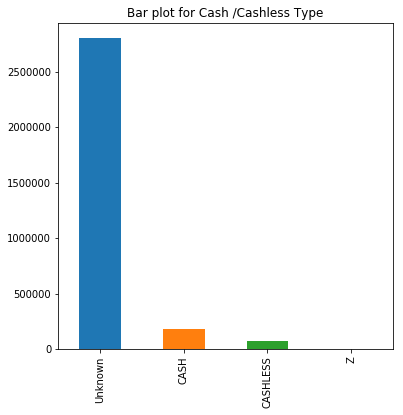

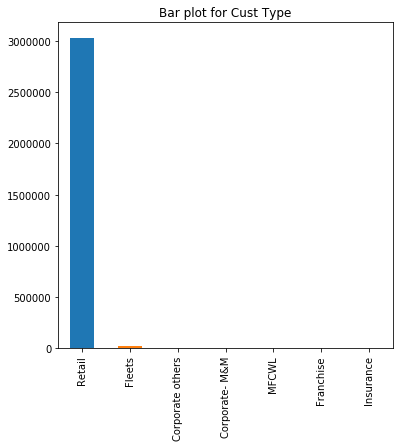

In [24]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = final_data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

In [25]:
cot_cols1=['Print Status','Partner Type', 'Data Origin', 'Title','District']

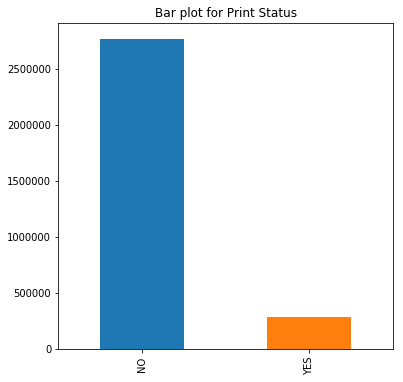

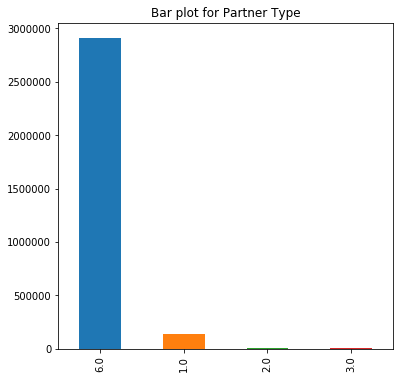

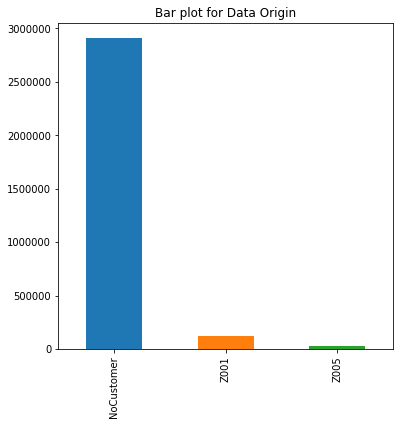

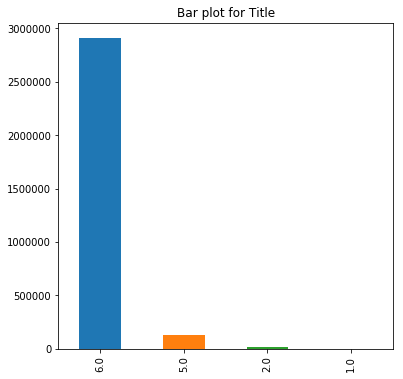

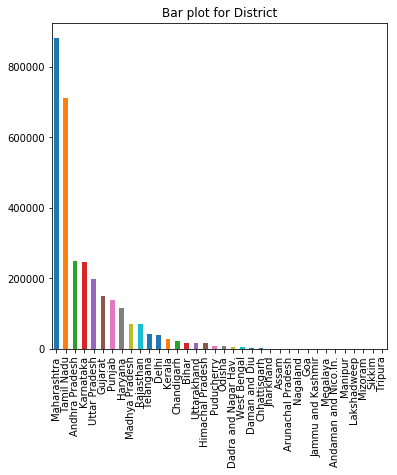

In [26]:
for col in cot_cols1:   
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = final_data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

Text(0.5, 0, 'Model')

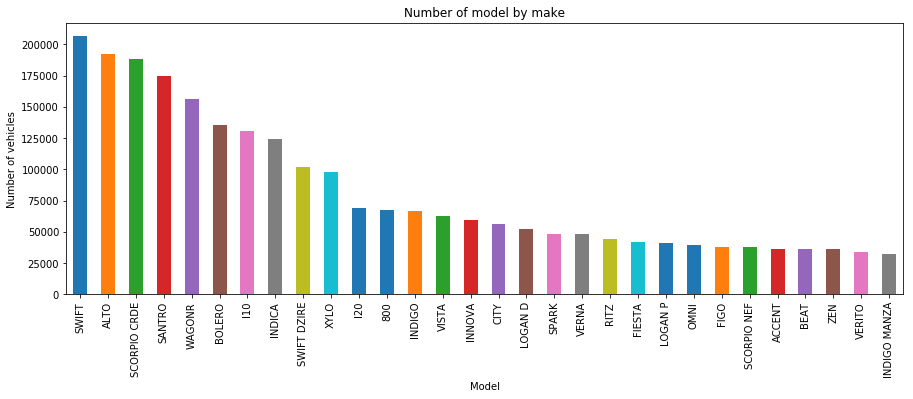

In [27]:
final_data['Model'].value_counts().nlargest(30).plot(kind='bar', figsize=(15,5))
plt.title("Number of model by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Model')

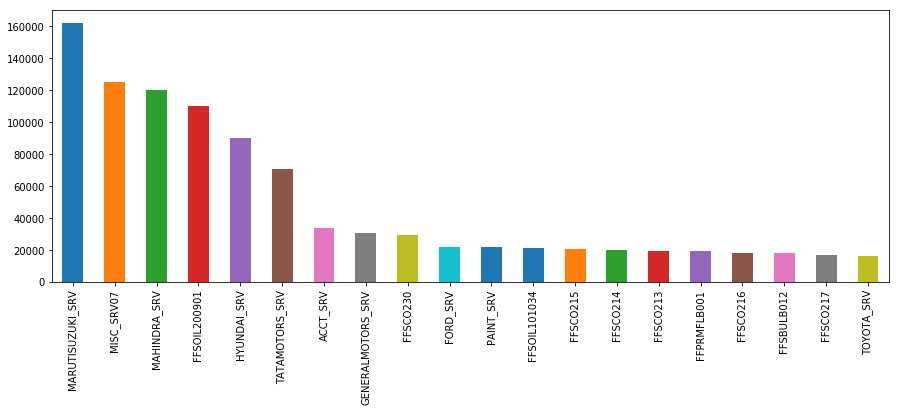

In [28]:
final_data['Material'].value_counts().nlargest(20).plot(kind='bar', figsize=(15,5))

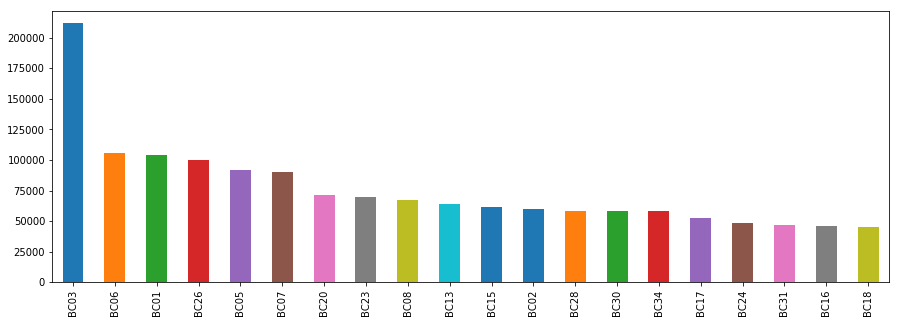

In [29]:
final_data['Plant'].value_counts().nlargest(20).plot(kind='bar', figsize=(15,5))

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


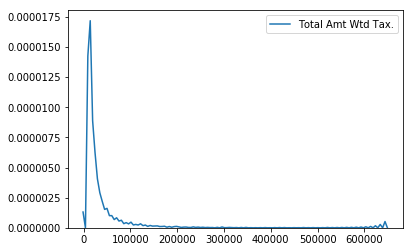

In [30]:
sns.kdeplot(final_data['Total Amt Wtd Tax.'])

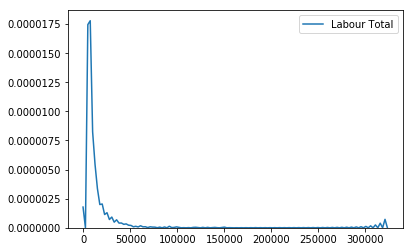

In [31]:
sns.kdeplot(final_data['Labour Total'])

In [32]:
final_data.groupby(['Model','Make'])['Parts Total'].mean().sort_values(ascending=False)

Model                 Make                
Q5                    AUDI                    104861.506319
GL-CLASS              MERCEDES BENZ            93878.748667
X1                    BMW                      92539.485000
S 350 L               MERCEDES BENZ            67278.446111
MONTERO               MITSUBISHI MOTORS        44525.486850
MINIS                 BMW                      35695.218462
CAPTIVA               GENERAL MOTORS           33520.418318
XENON XT              TATA MOTORS              31647.710967
FORTUNER              TOYOTA                   30934.582465
BMW-M5                BMW                      28849.426000
X3                    BMW                      28337.975397
ENJOY                 GENERAL MOTORS           26548.053457
PAJERO                MITSUBISHI MOTORS        25227.048949
LAND CRUISER PRADO    TOYOTA                   24813.413506
SUPERB                SKODA                    24738.290011
CLASSIC               MAHINDRA &  MAHINDRA     21974.7113

In [33]:
final_data.groupby(['Model','Make'])['Total Amt Wtd Tax.'].mean().sort_values(ascending=False)

Model                 Make                
Q5                    AUDI                    119159.764861
X1                    BMW                     107554.344800
GL-CLASS              MERCEDES BENZ            99817.282000
S 350 L               MERCEDES BENZ            90331.821111
MONTERO               MITSUBISHI MOTORS        49227.346772
G CLASS               MERCEDES BENZ            46027.295750
CAPTIVA               GENERAL MOTORS           43787.838347
XENON XT              TATA MOTORS              43640.951732
MINIS                 BMW                      42063.418462
CLASSIC               MAHINDRA &  MAHINDRA     40540.044906
ZEST                  TATA MOTORS              40202.379513
FORTUNER              TOYOTA                   37662.509201
X3                    BMW                      37184.508889
ENJOY                 GENERAL MOTORS           36773.390126
BMW-M5                BMW                      35953.114909
PAJERO                MITSUBISHI MOTORS        34266.8719

In [34]:
final_data.groupby(['Model','Make'])['Labour Total'].mean().sort_values(ascending=False)

Model                   Make                
A6                      AUDI                    29335.085570
GYPSY 1300              MARUTI SUZUKI           17282.436098
S 350 L                 MERCEDES BENZ           16672.695000
ZEST                    TATA MOTORS             16435.207447
CLASSIC                 MAHINDRA &  MAHINDRA    15263.324358
S 320 CDI L             MERCEDES BENZ           14384.013636
X1                      BMW                     14081.473600
Q5                      AUDI                    13505.819792
GRAND                   HINDUSTAN MOTORS        11570.340577
MAHINDRA PIK UP         MAHINDRA &  MAHINDRA    10703.046099
RHINO RX                SONALIKA                10457.163261
KOLEOS                  RENAULT                 10357.475565
XENON XT                TATA MOTORS             10145.039437
Q7                      AUDI                    10055.533782
A4                      AUDI                     9378.264698
X-TRAIL                 NISSAN          

In [35]:
bin_range = range(0,1000000,25000)

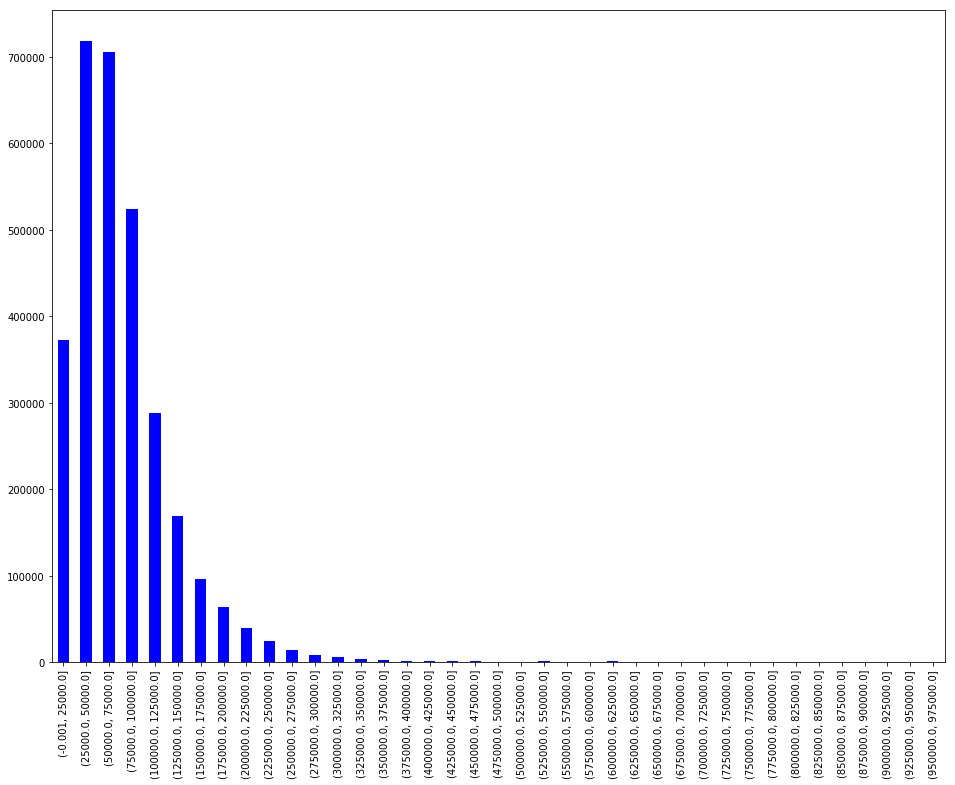

In [36]:
#out = pd.cut(final_data['KMs Reading'], bins=[0, 10000, 50000,75000, 100000,500000,9999999], include_lowest=True)
#ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#plt.xticks(rotation=90)
#plt.show()

out = pd.cut(final_data['KMs Reading'], bins=list(bin_range), include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(16,12))
plt.xticks(rotation=90)
plt.show()

In [37]:
make_list = set(final_data.Make)

In [38]:
set(final_data.Model)

{'207',
 '3 SERIES',
 '5 SERIES',
 '500',
 '6 SERIES',
 '7 SERIES',
 '800',
 'A STAR',
 'A4',
 'A6',
 'A7',
 'A8',
 'ACCENT',
 'ACCORD',
 'ACE',
 'ADVENTURE',
 'ALTO',
 'AMAZE',
 'AMBASSADOR',
 'AMEO',
 'ARIA',
 'ARMADA',
 'ASTAR',
 'AUSTIN',
 'AVEO',
 'AVEO UV-A',
 'AVIGO',
 'BALENO',
 'BEAT',
 'BMW X6',
 'BMW-M3',
 'BMW-M5',
 'BMW-M6',
 'BOLERO',
 'BOLERO PIK UP',
 'BOLT',
 'BREZZA',
 'BRIO',
 'BRV',
 'C-CLASS',
 'CAMRY',
 'CAPTIVA',
 'CAYENNE',
 'CAYMAN S',
 'CEDIA',
 'CELERIO',
 'CHEROKEE',
 'CHEVROLET CRUZE',
 'CIAZ',
 'CIELO',
 'CITY',
 'CIVIC',
 'CL-CLASS',
 'CLASSIC',
 'CLK-CLASS',
 'CLS-CLASS',
 'COMMANDER',
 'CONTESSA',
 'COROLLA',
 'COROLLA ALTIS',
 'CR-V',
 'CRETA',
 'DATSUN GO',
 'DUSTER',
 'E-CLASS',
 'ECO SPORT',
 'ECOSPORT',
 'EECO',
 'ELANTRA',
 'ENDEAVOUR',
 'ENJOY',
 'EON',
 'ERTIGA',
 'ESCORT',
 'ESTEEM 1000',
 'ESTEEM 1300',
 'ESTILO',
 'ETIOS',
 'EVALIA',
 'FABIA',
 'FIESTA',
 'FIGO',
 'FLUENCE',
 'FOCUS',
 'FORCE ONE',
 'FORESTER',
 'FORTUNER',
 'FUSION',
 'G CLA

In [39]:
make_model_dict = {}
for make in make_list:
    make_model_dict[make] = set(final_data[final_data['Make']==make]['Model'])
    
make_model_dict

{'HINDUSTAN MOTORS': {'AMBASSADOR',
  'AVIGO',
  'CONTESSA',
  'GRAND',
  'PUSHPAK',
  'TREKKER'},
 'DAEWOO': {'CIELO', 'MATIZ', 'NEXIA'},
 'JEEP': {'CHEROKEE'},
 'VOLKSWAGEN': {'AMEO', 'JETTA', 'PASSAT', 'POLO', 'TOUAREG', 'VENTO'},
 'MORRIS': {'AUSTIN'},
 'SKODA': {'FABIA', 'LAURA', 'OCTAVIA', 'RAPID', 'ROOMSTER', 'SUPERB', 'YETI'},
 'BMW': {'3 SERIES',
  '5 SERIES',
  '6 SERIES',
  '7 SERIES',
  'BMW X6',
  'BMW-M3',
  'BMW-M5',
  'BMW-M6',
  'MINIS',
  'X1',
  'X3',
  'X5',
  'Z4'},
 'TOYOTA': {'CAMRY',
  'COROLLA',
  'COROLLA ALTIS',
  'ETIOS',
  'FORTUNER',
  'INNOVA',
  'LAND CRUISER PRADO',
  'QUALIS',
  'TATA-NANO'},
 'HYUNDAI': {'ACCENT',
  'ALTO',
  'CRETA',
  'ELANTRA',
  'EON',
  'GETZ',
  'I10',
  'I20',
  'SANTA FE',
  'SANTRO',
  'SANTRO XING',
  'SONATA',
  'SONATA V-6',
  'TERRACAN',
  'TUCSON',
  'VELOSTER',
  'VERNA',
  'XCENT'},
 'PREMIER\xa0AUTOMOBILES': {'PADMINI', 'RIO'},
 'HONDA': {'ACCORD',
  'AMAZE',
  'BRIO',
  'BRV',
  'CITY',
  'CIVIC',
  'CR-V',
  'JAZZ',

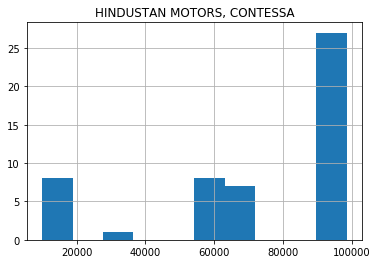

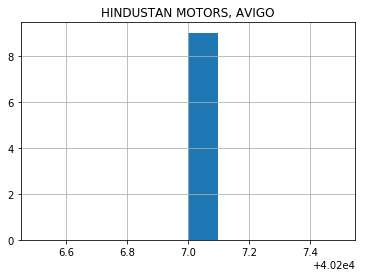

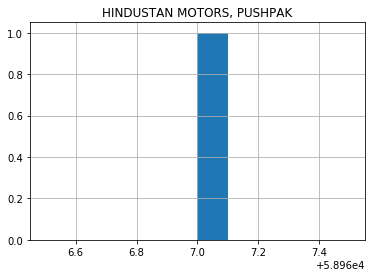

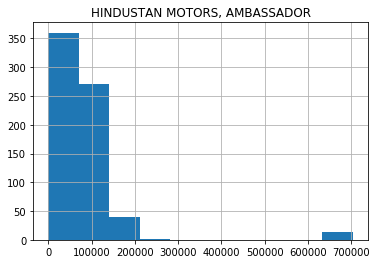

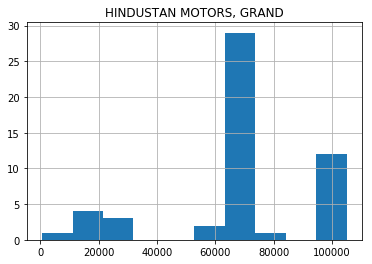

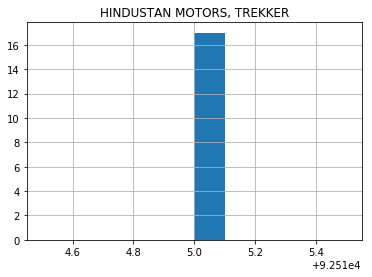

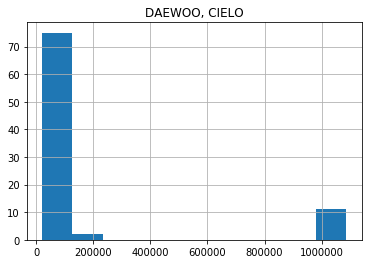

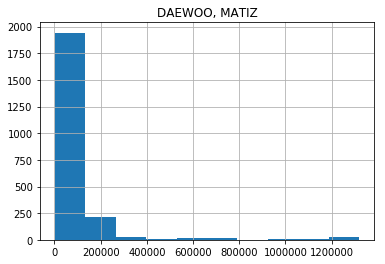

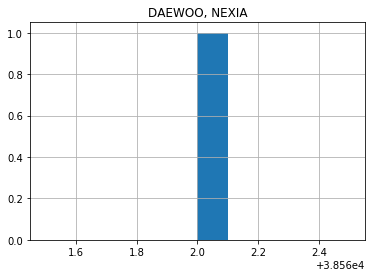

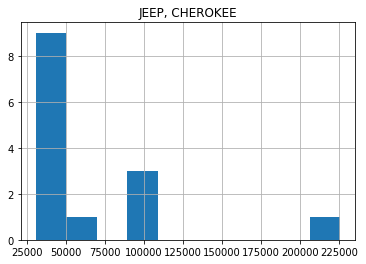

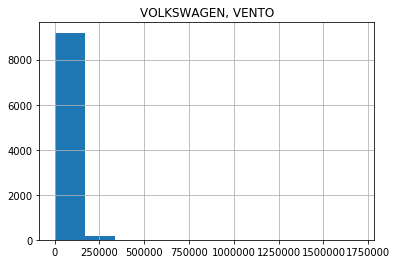

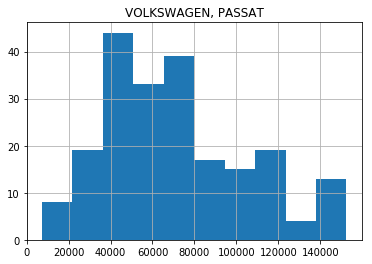

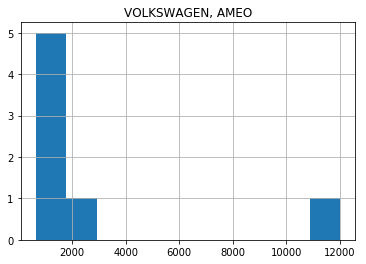

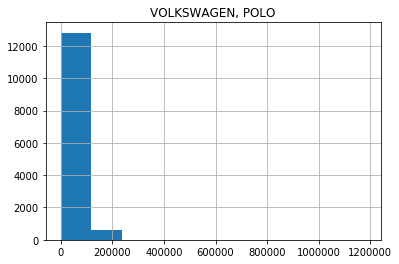

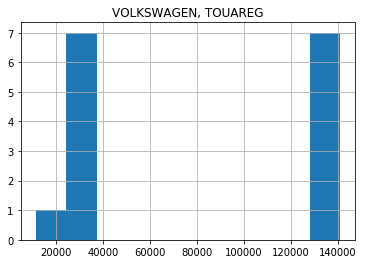

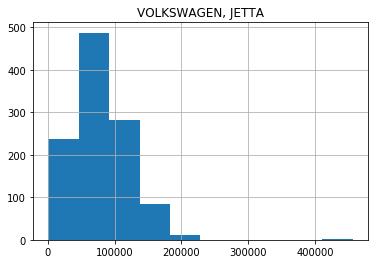

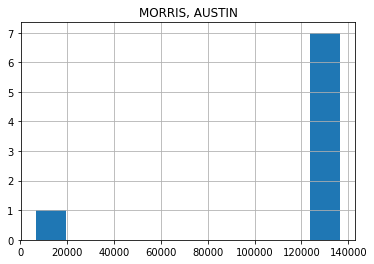

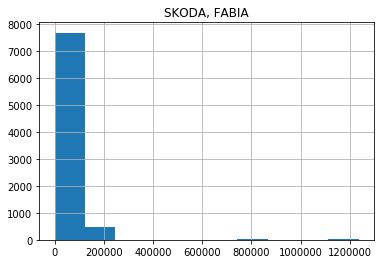

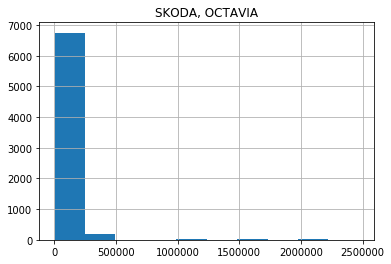

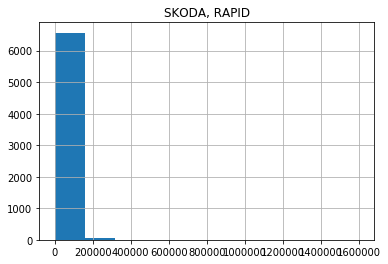

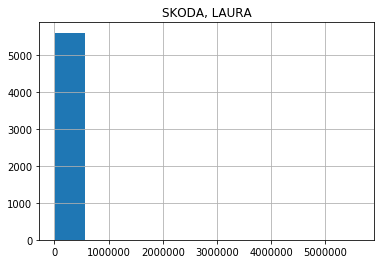

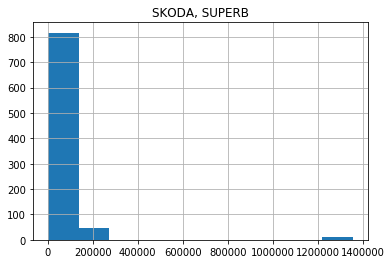

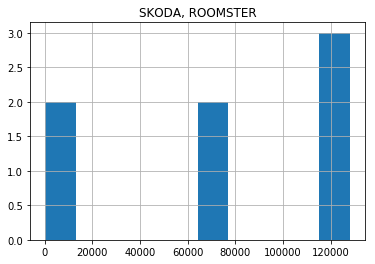

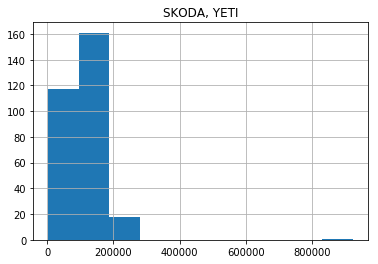

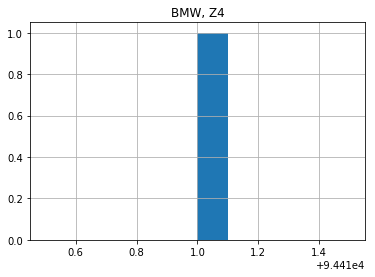

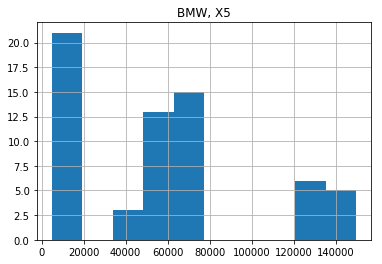

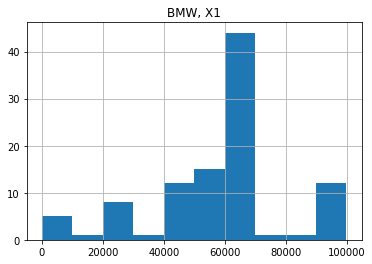

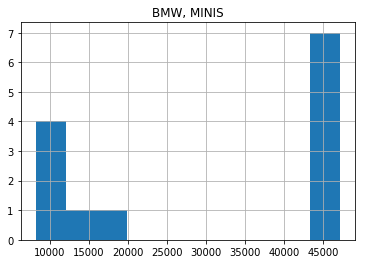

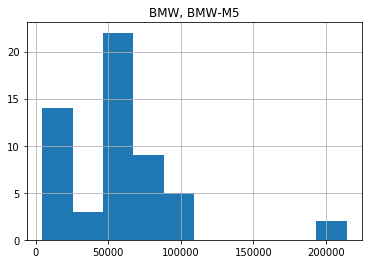

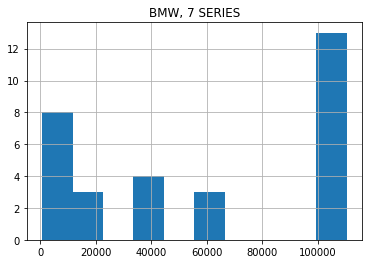

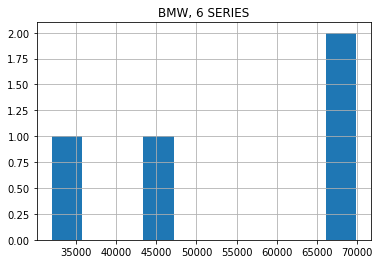

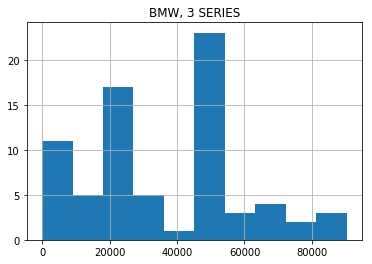

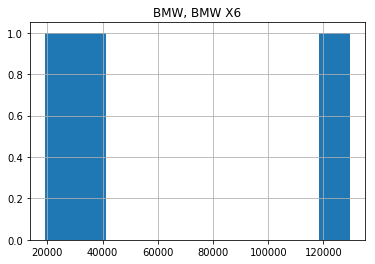

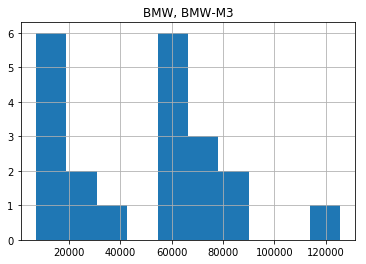

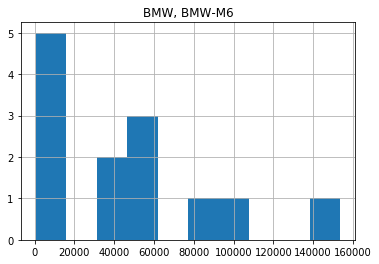

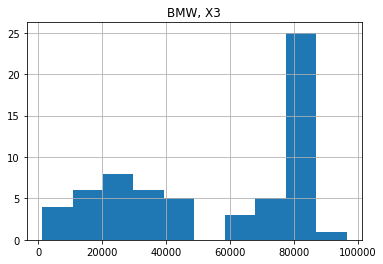

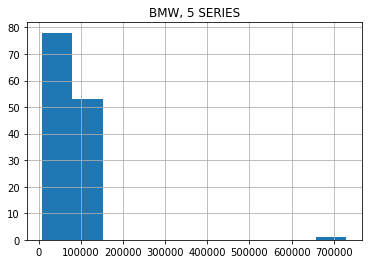

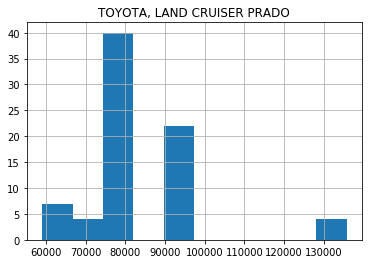

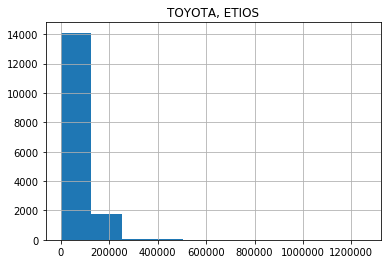

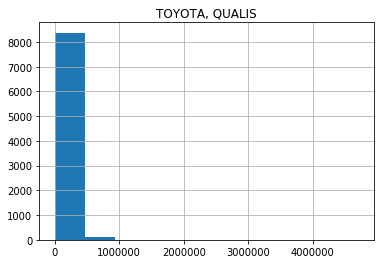

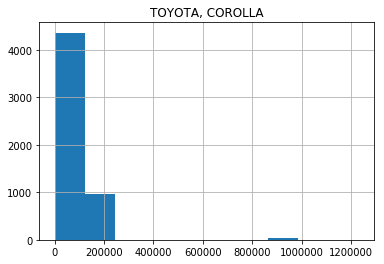

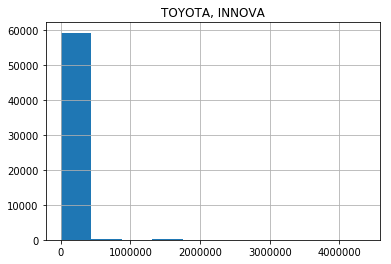

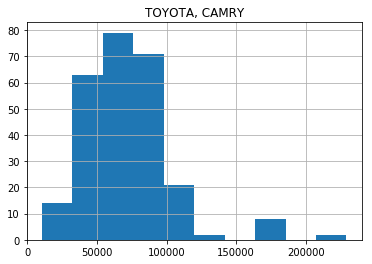

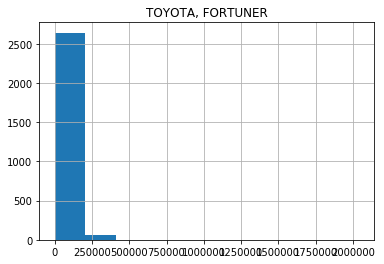

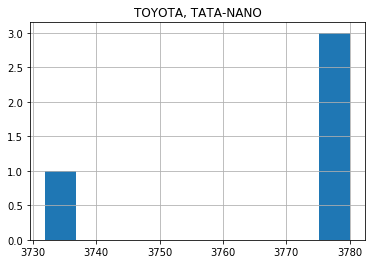

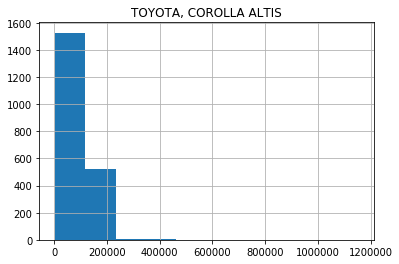

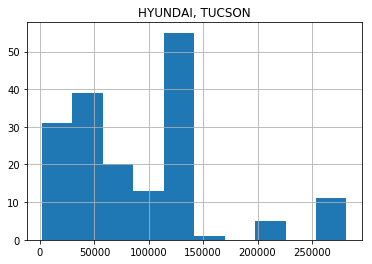

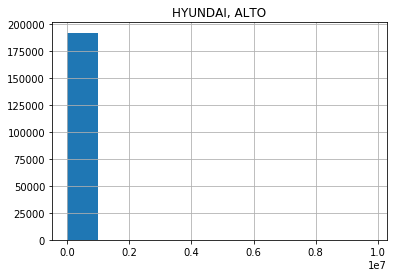

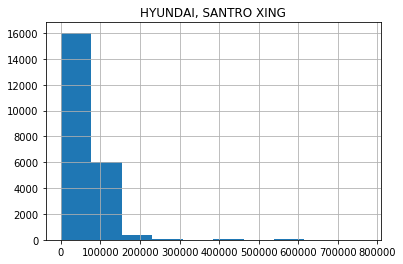

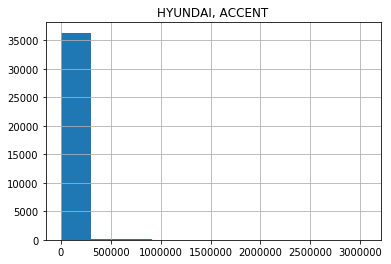

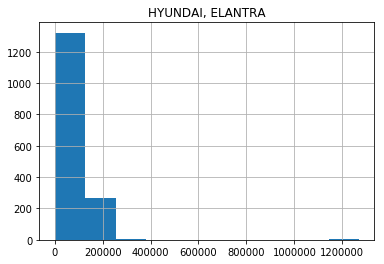

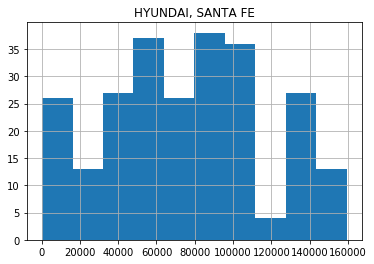

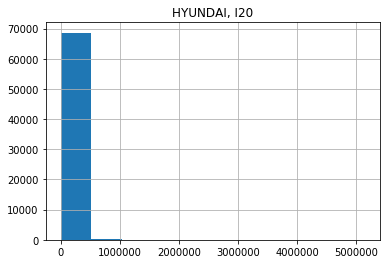

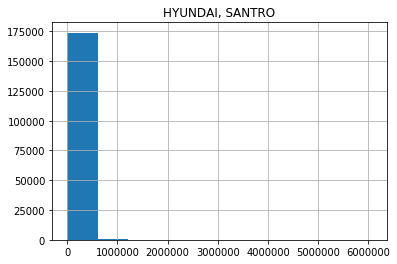

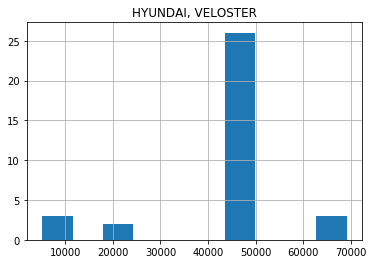

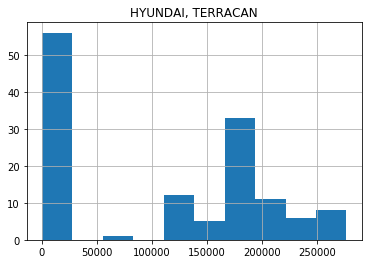

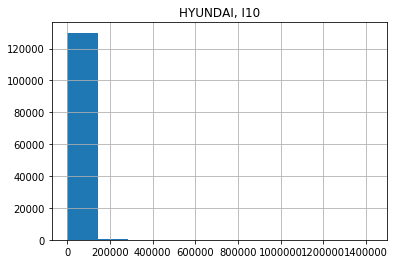

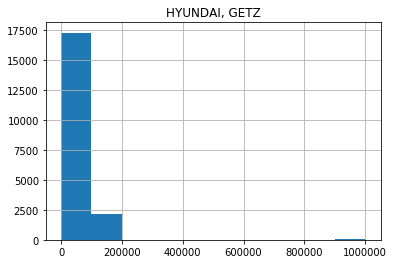

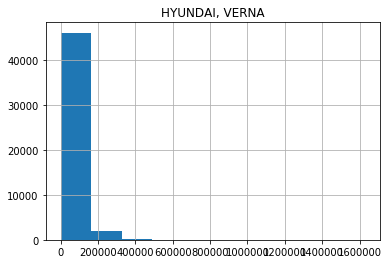

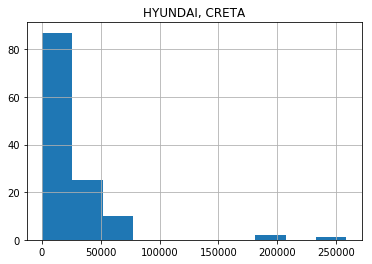

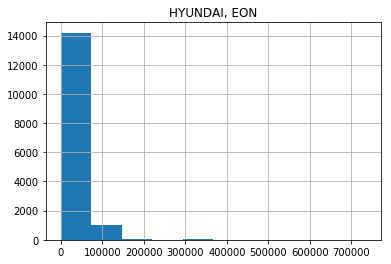

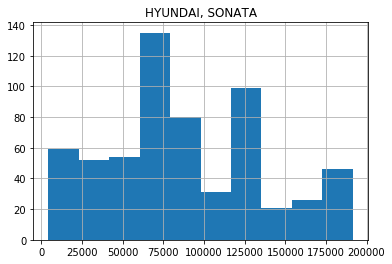

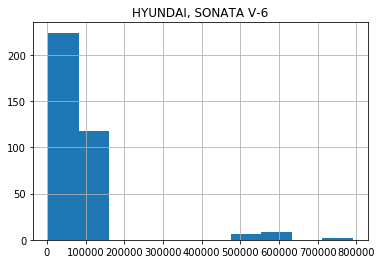

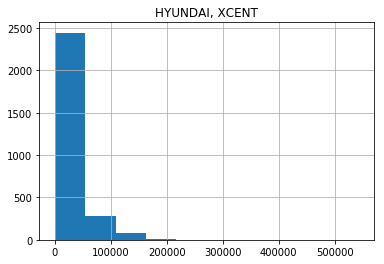

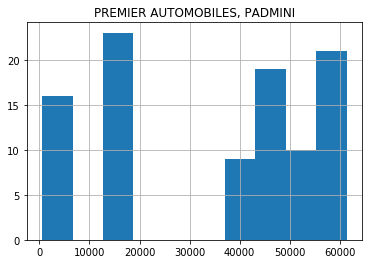

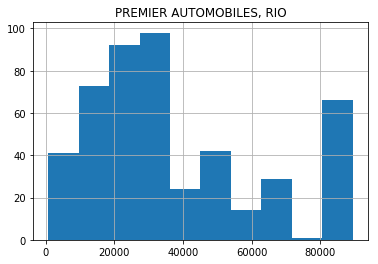

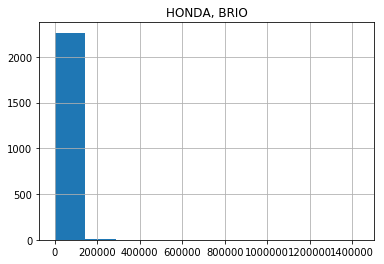

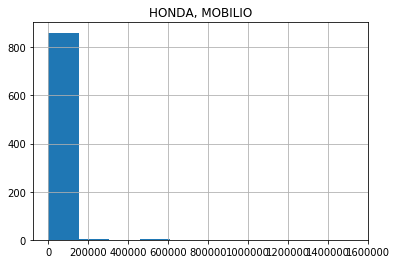

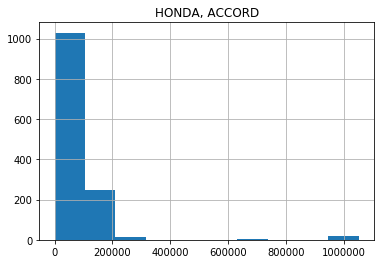

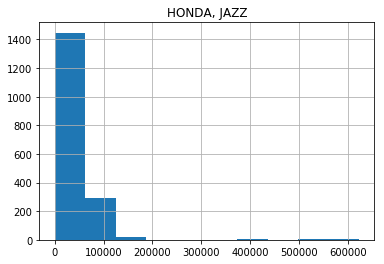

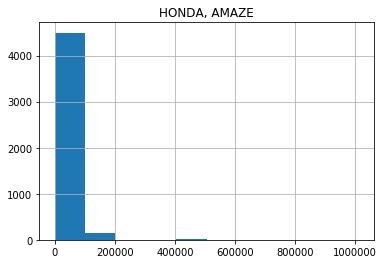

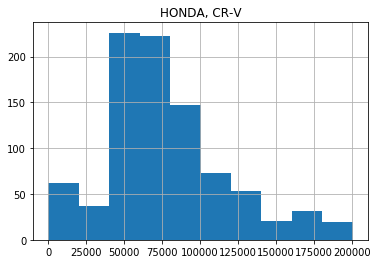

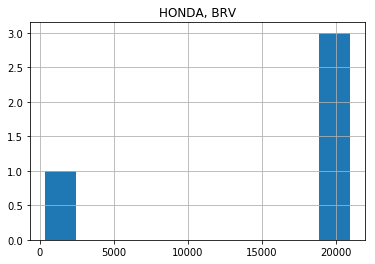

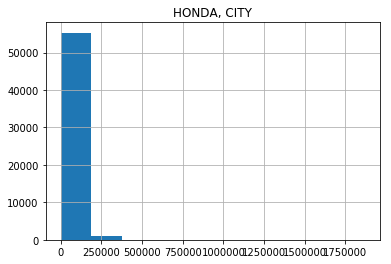

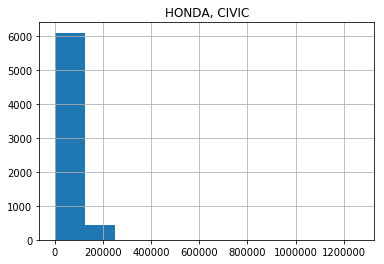

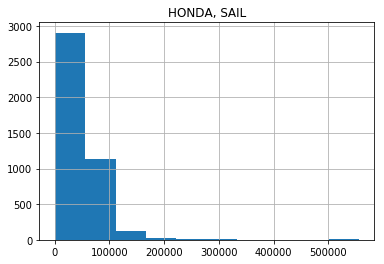

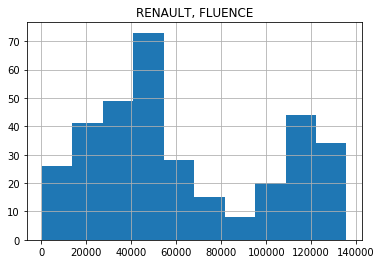

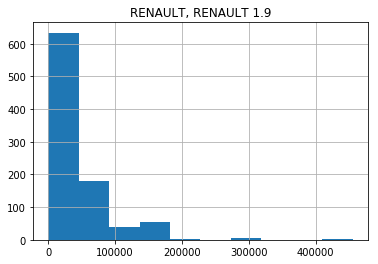

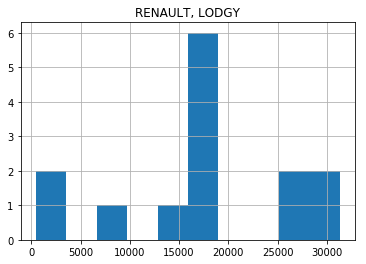

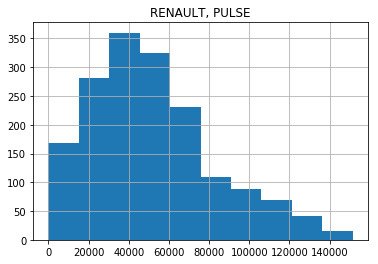

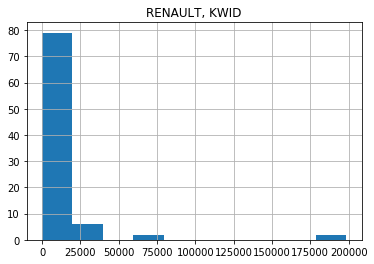

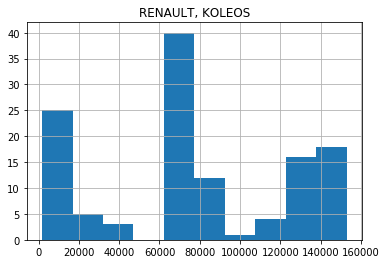

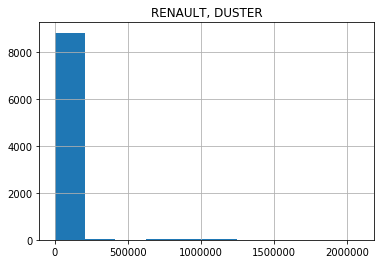

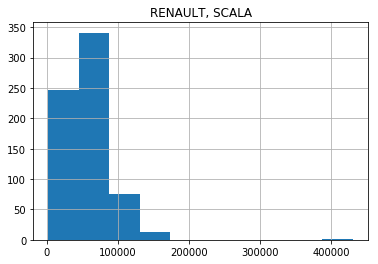

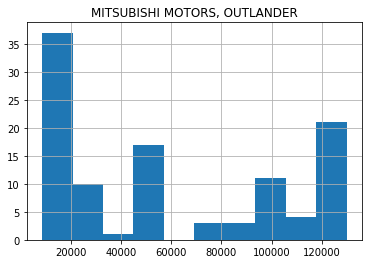

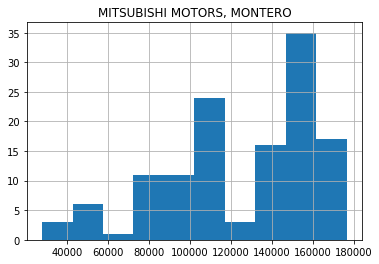

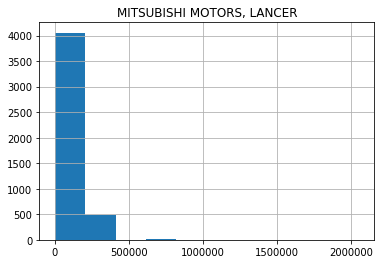

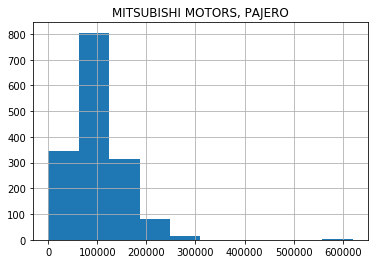

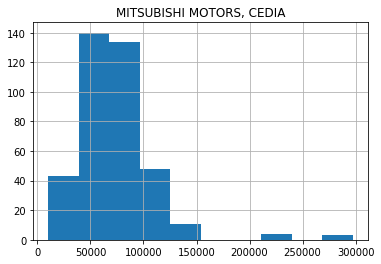

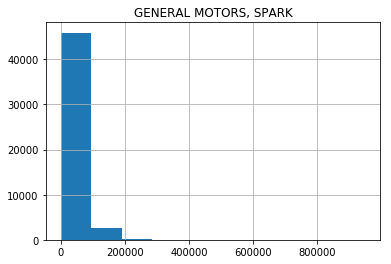

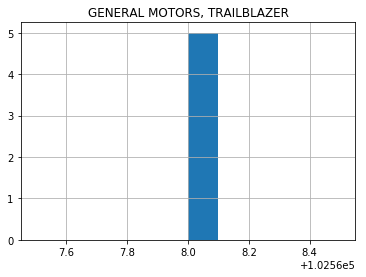

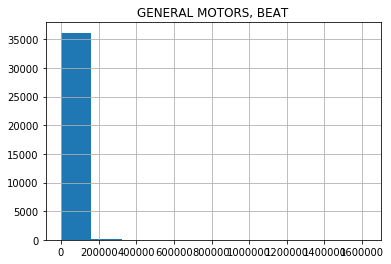

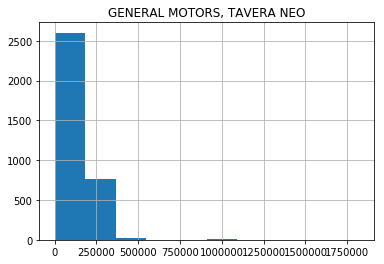

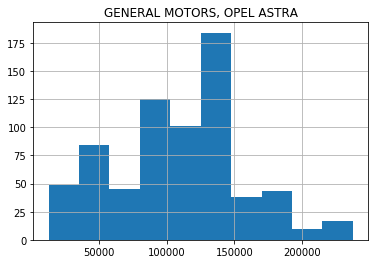

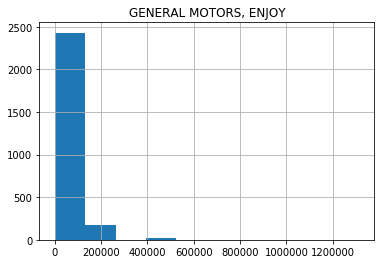

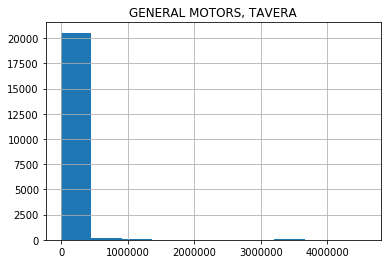

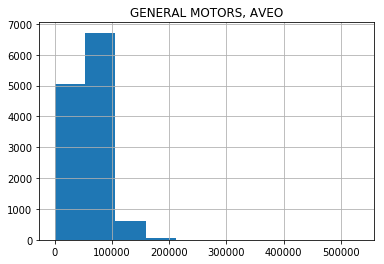

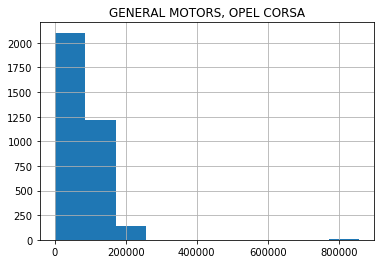

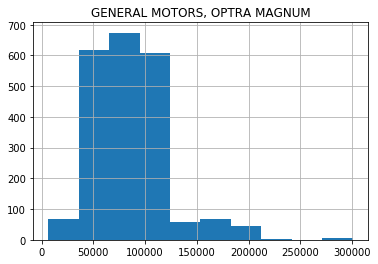

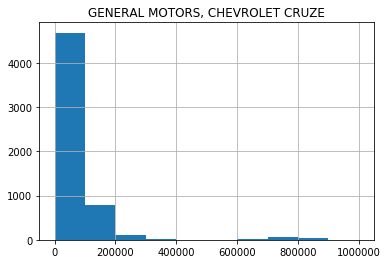

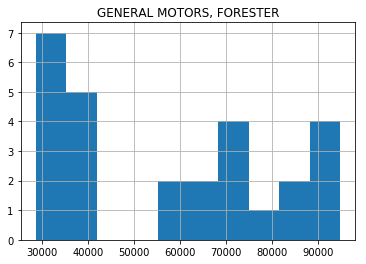

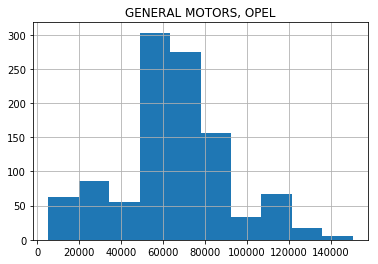

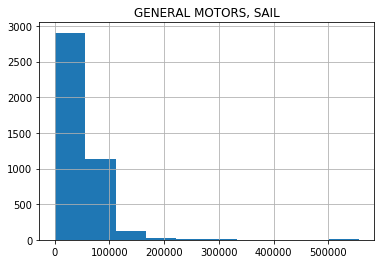

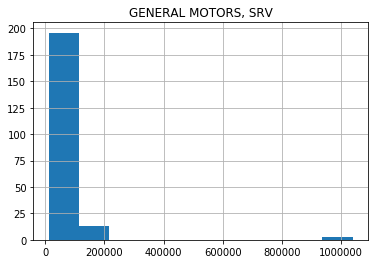

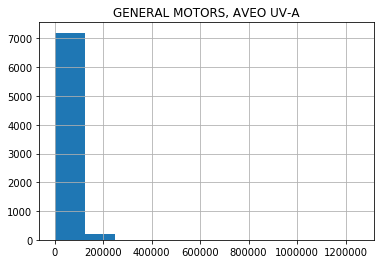

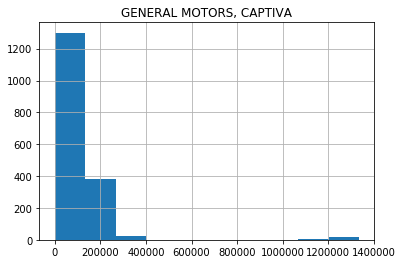

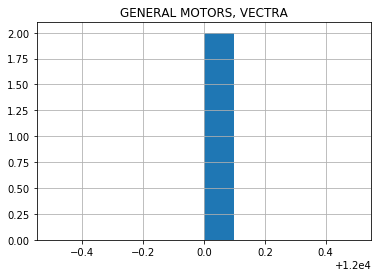

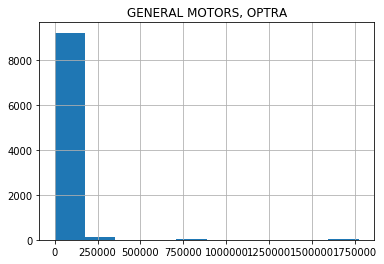

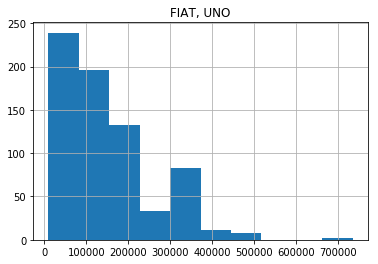

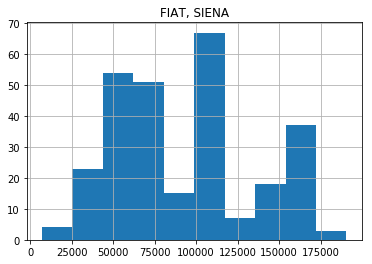

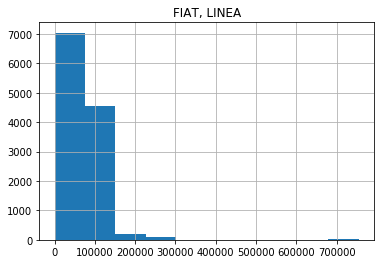

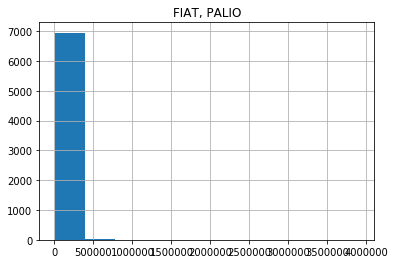

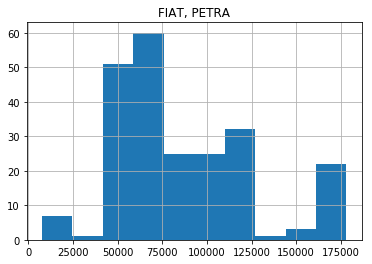

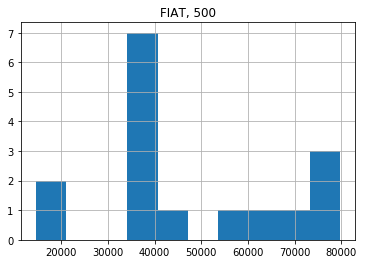

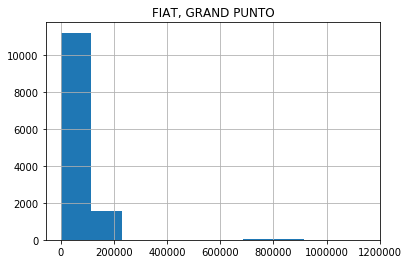

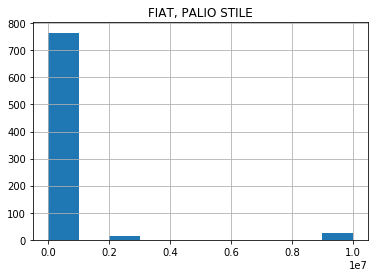

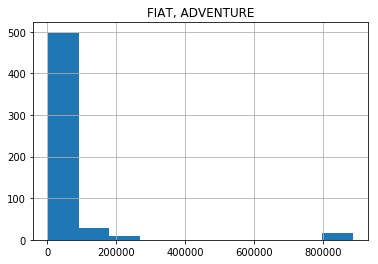

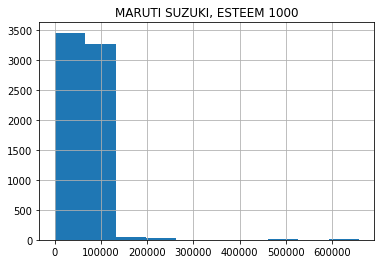

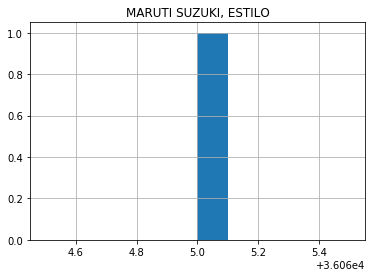

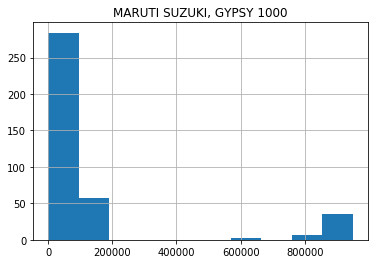

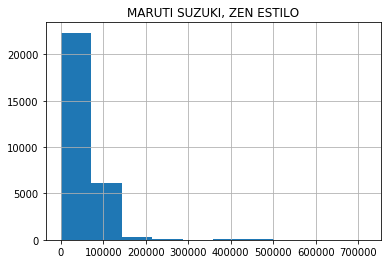

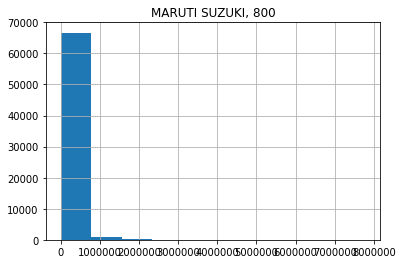

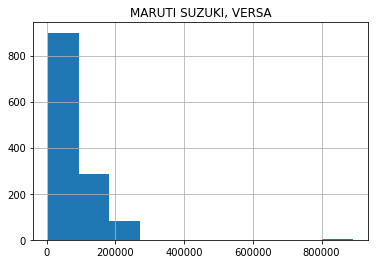

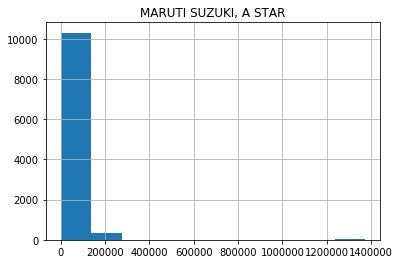

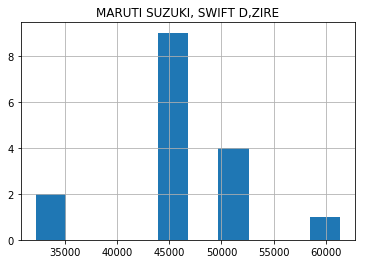

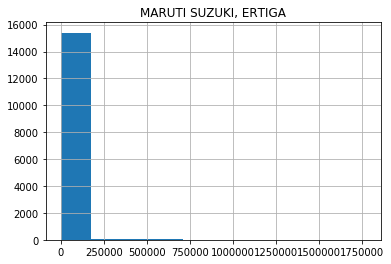

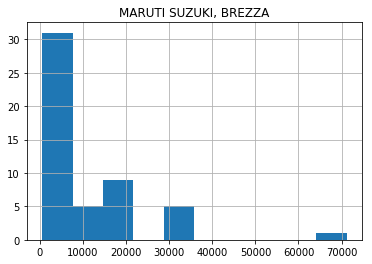

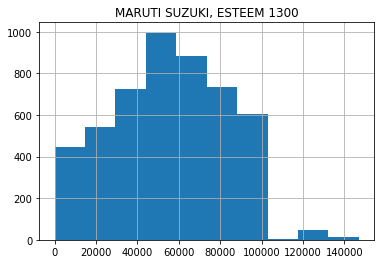

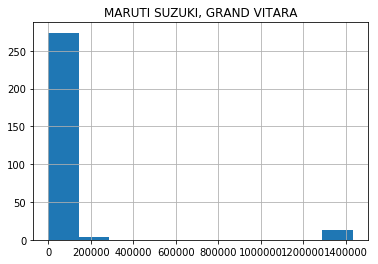

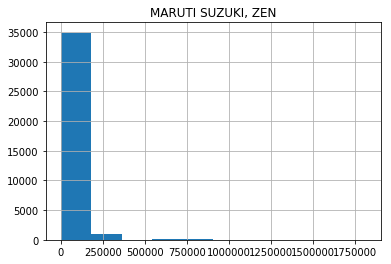

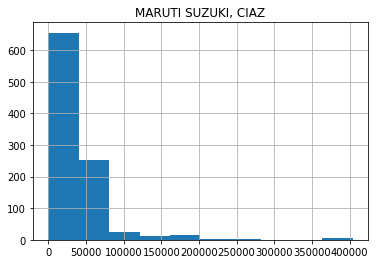

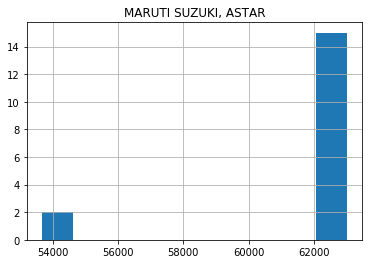

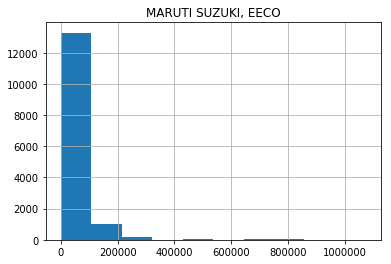

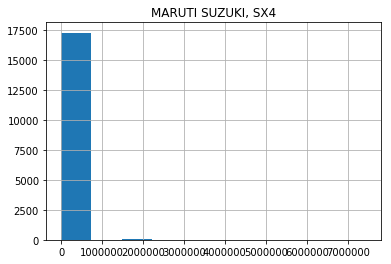

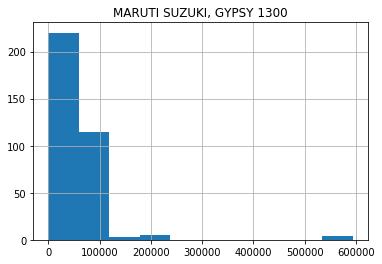

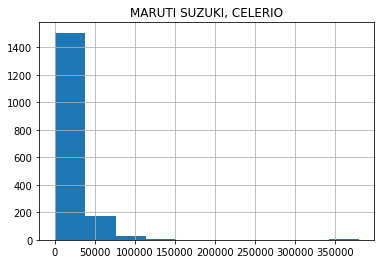

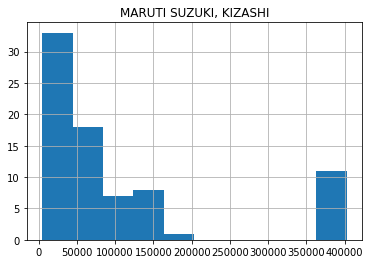

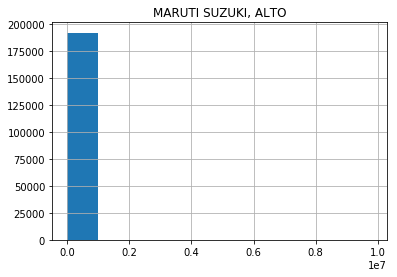

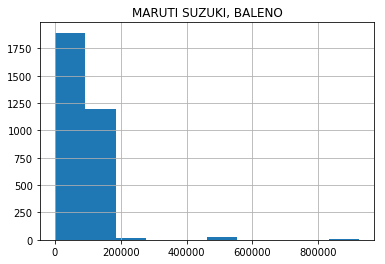

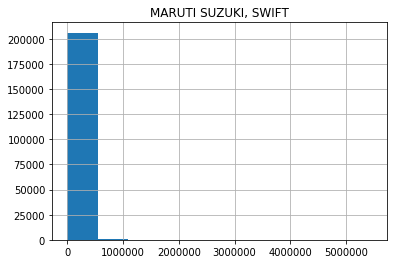

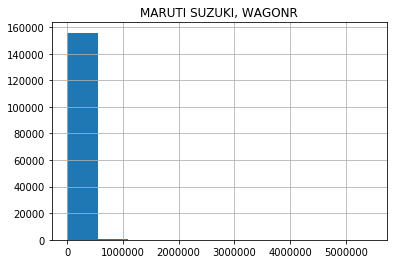

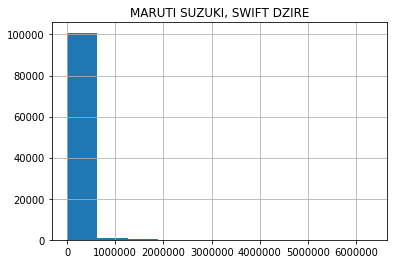

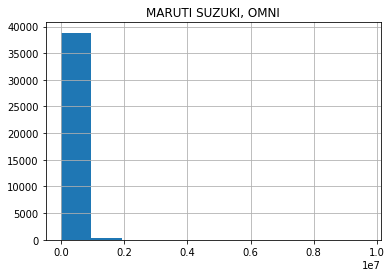

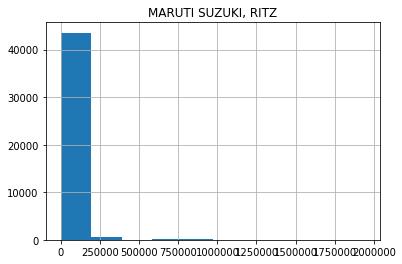

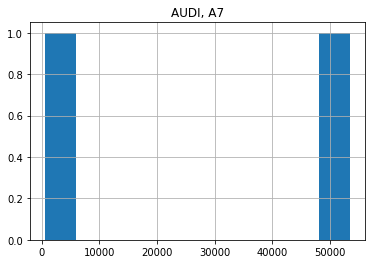

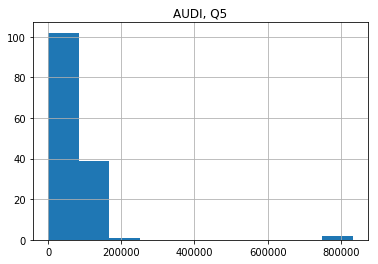

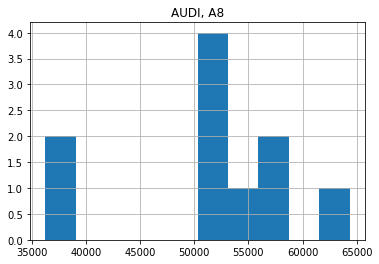

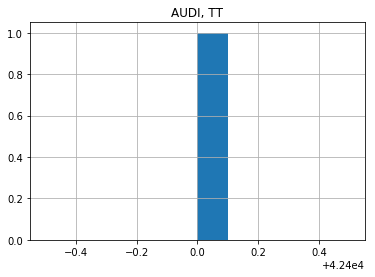

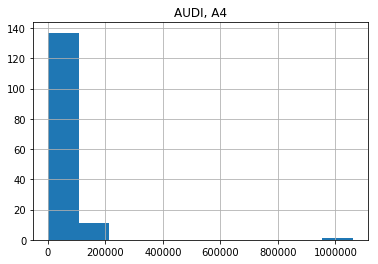

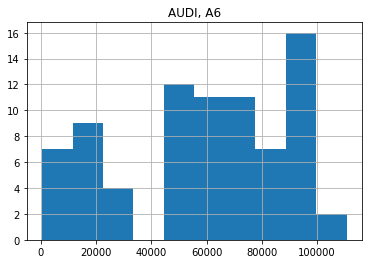

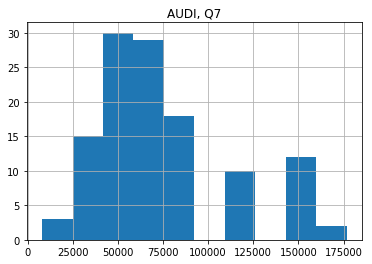

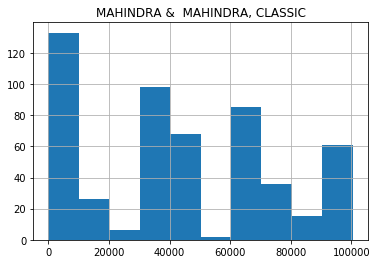

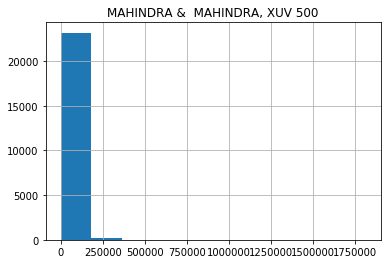

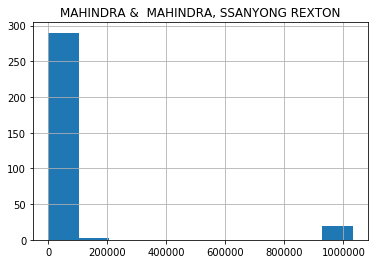

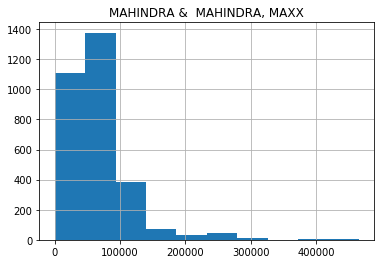

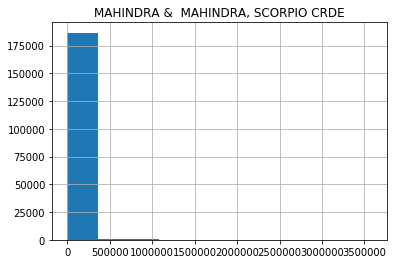

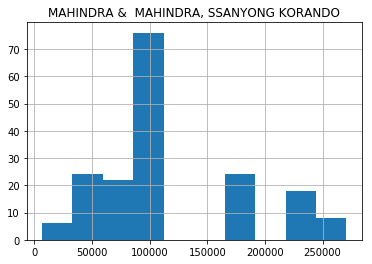

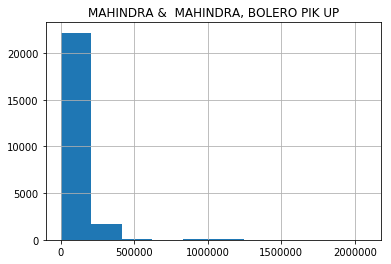

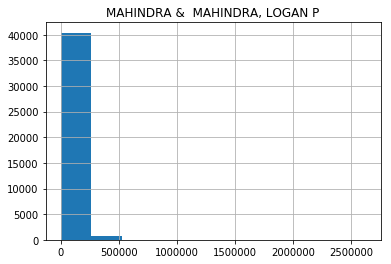

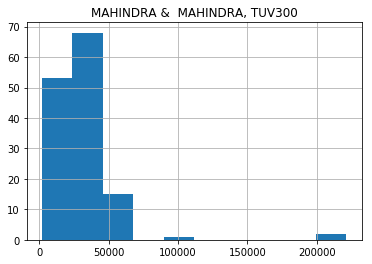

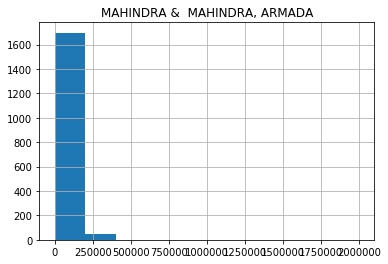

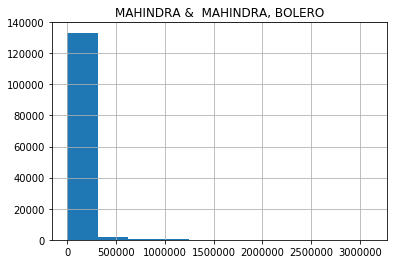

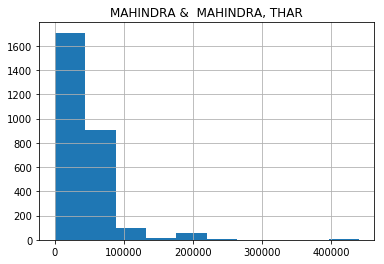

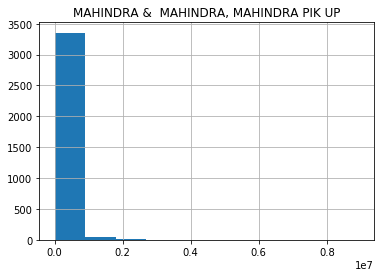

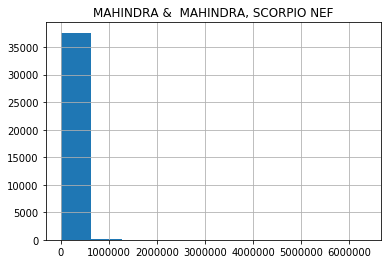

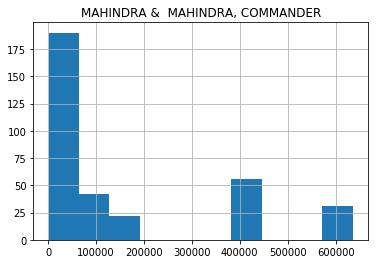

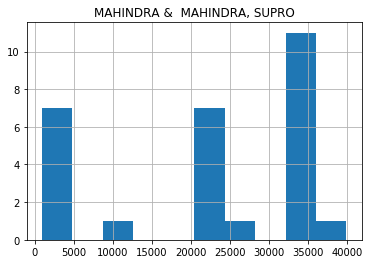

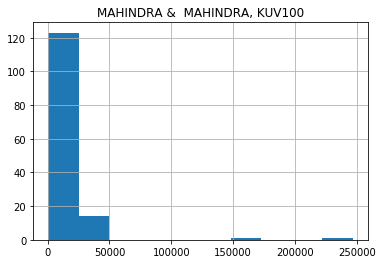

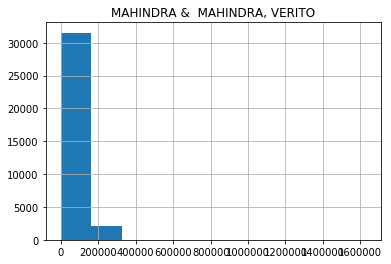

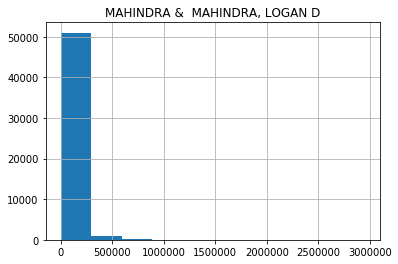

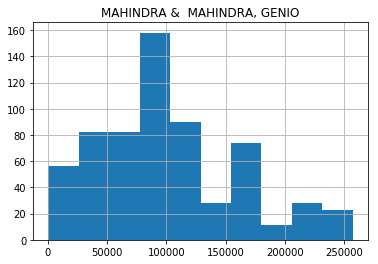

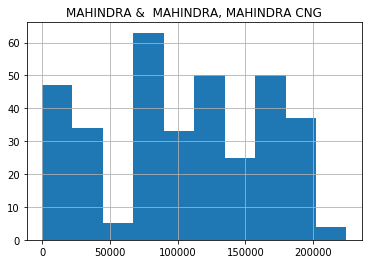

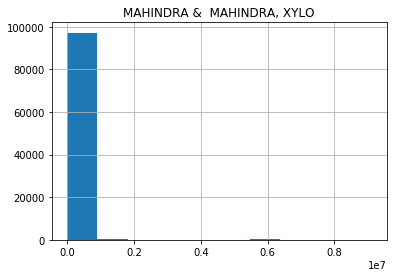

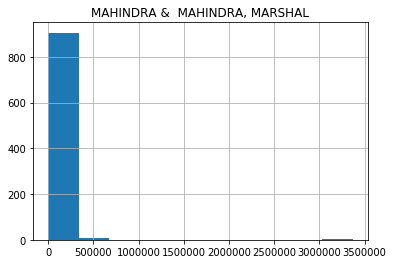

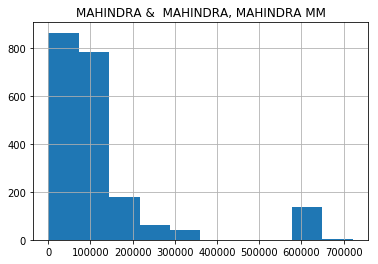

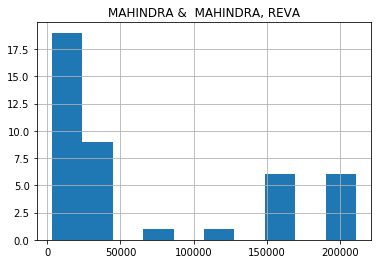

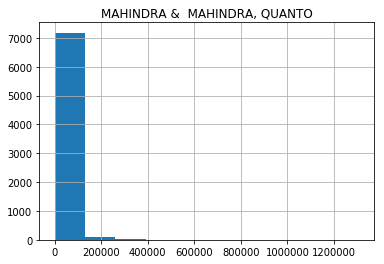

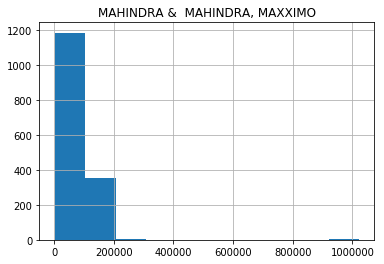

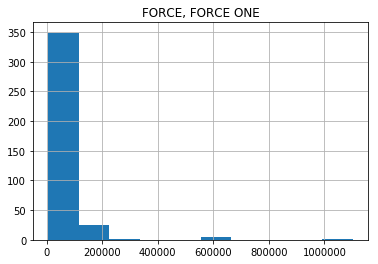

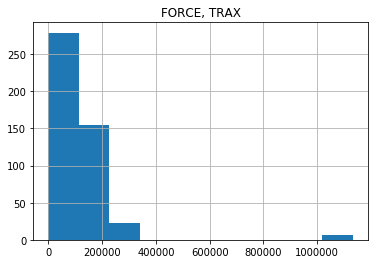

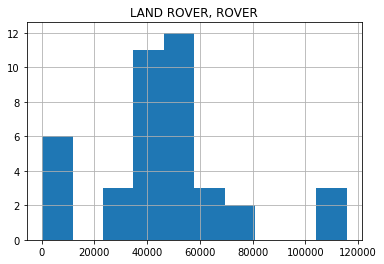

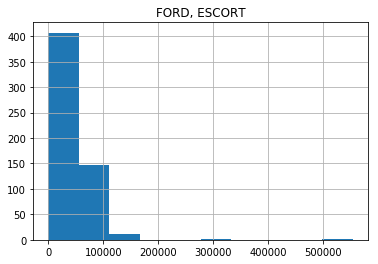

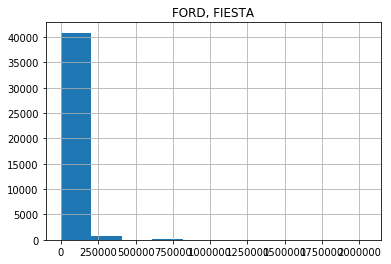

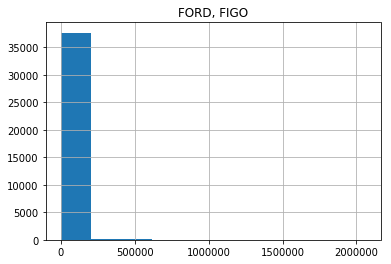

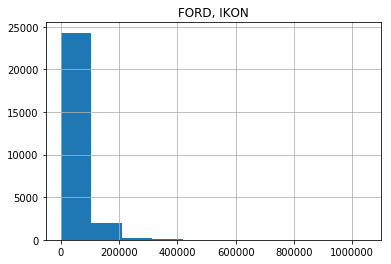

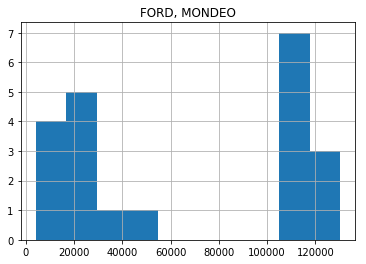

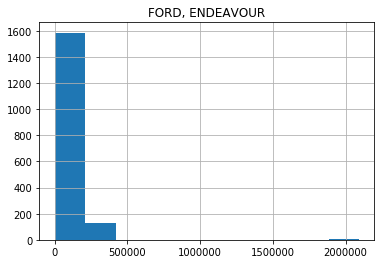

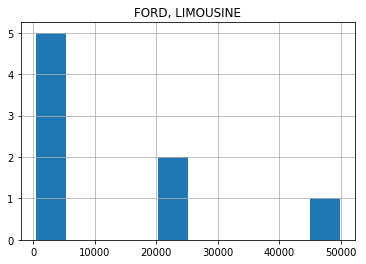

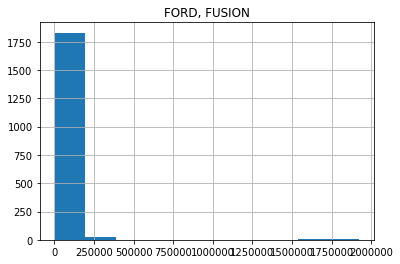

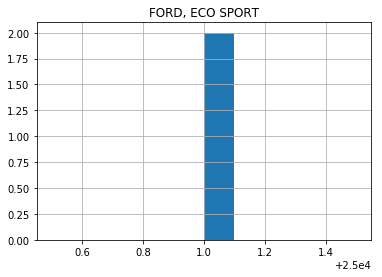

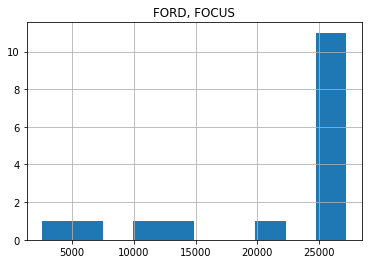

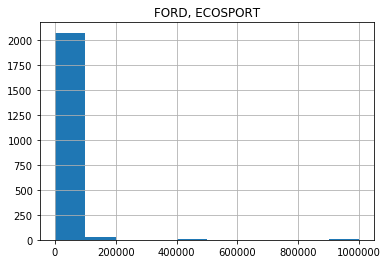

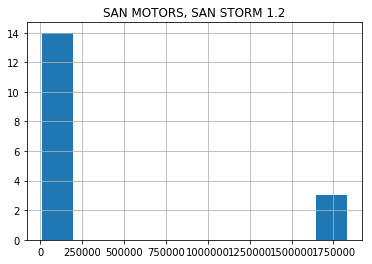

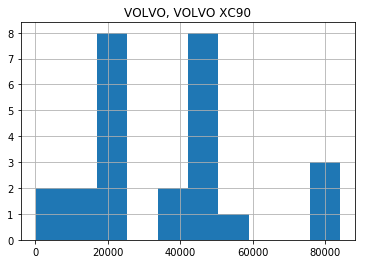

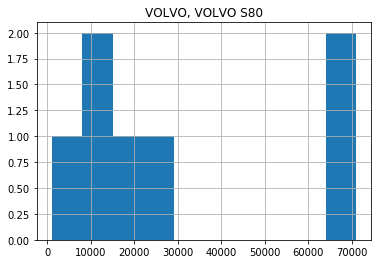

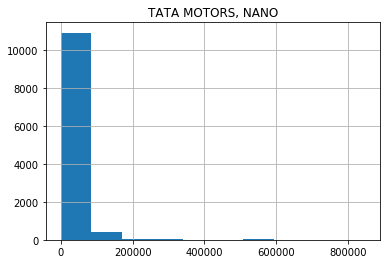

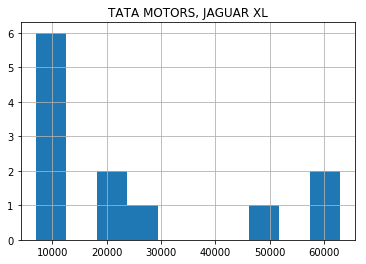

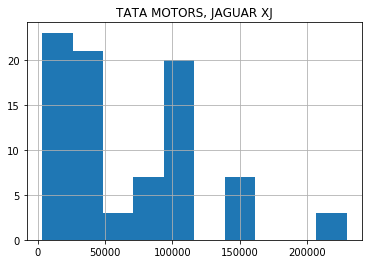

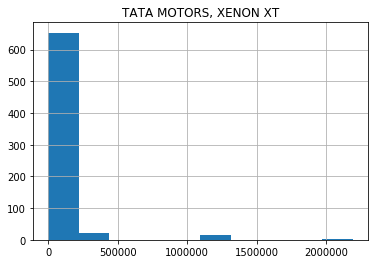

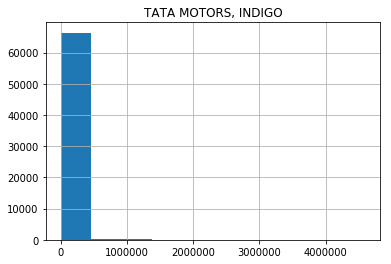

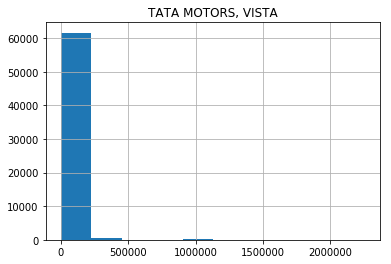

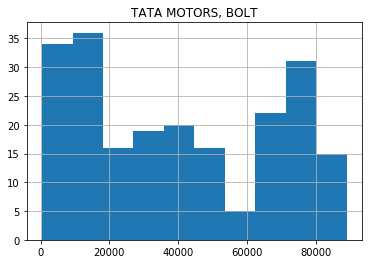

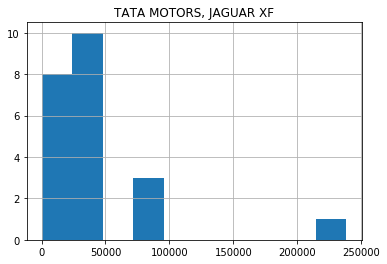

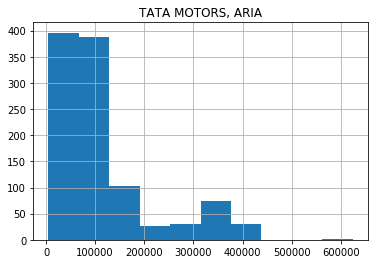

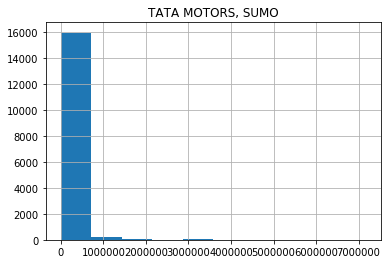

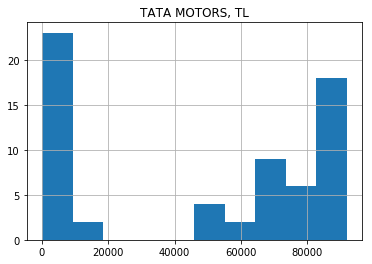

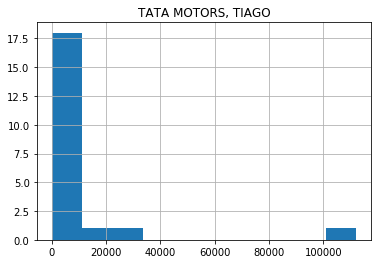

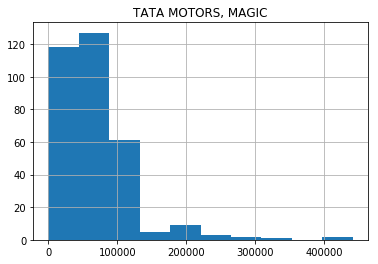

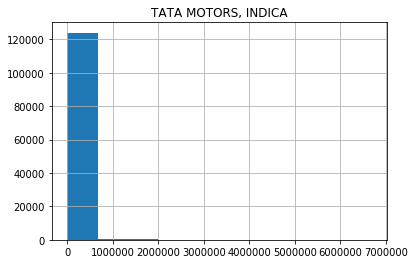

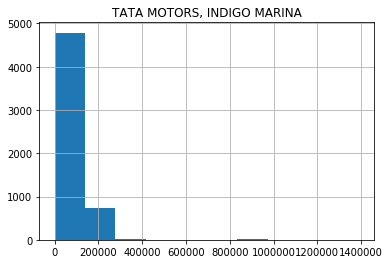

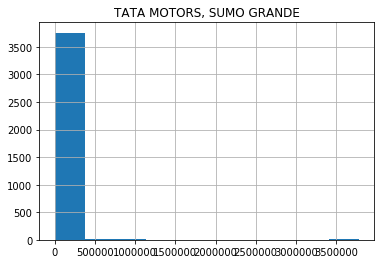

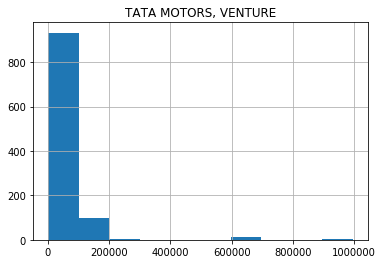

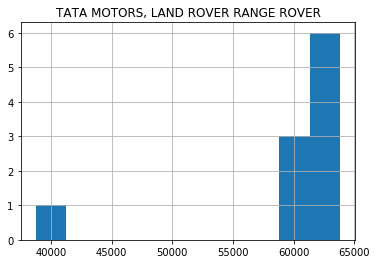

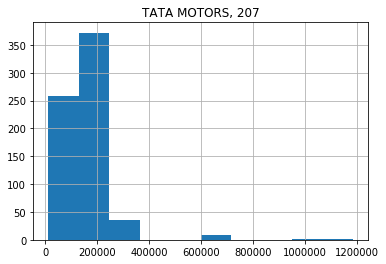

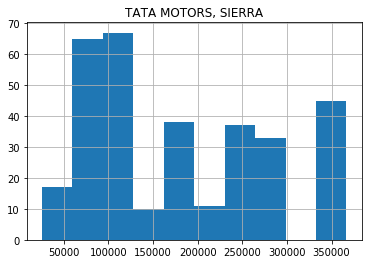

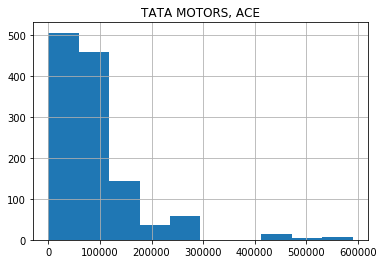

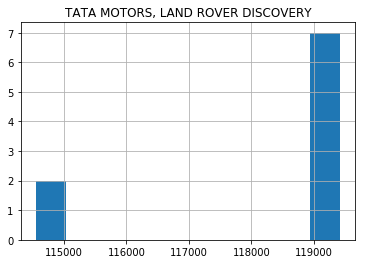

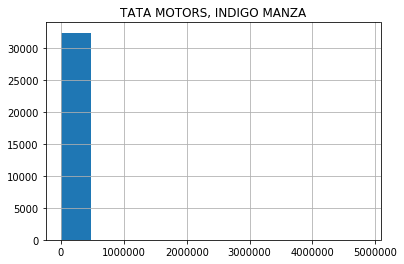

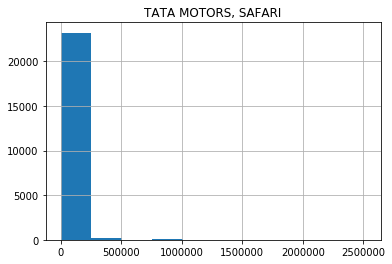

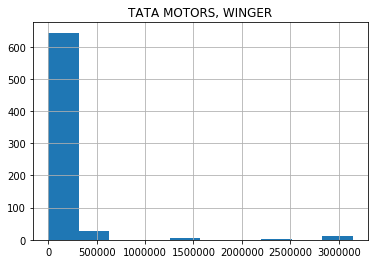

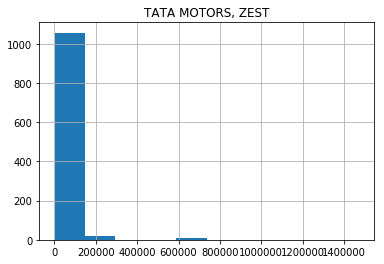

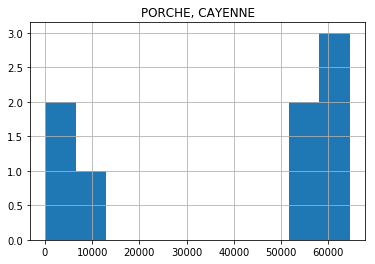

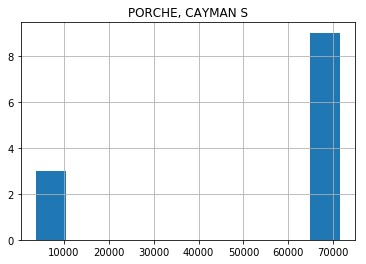

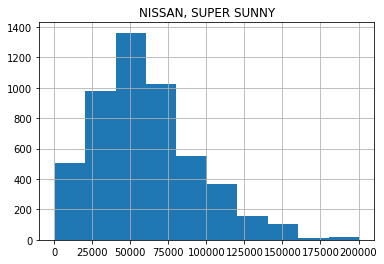

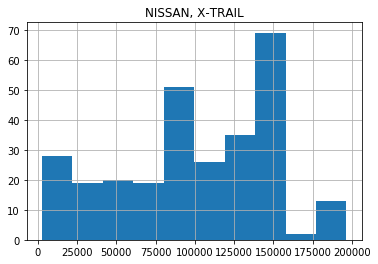

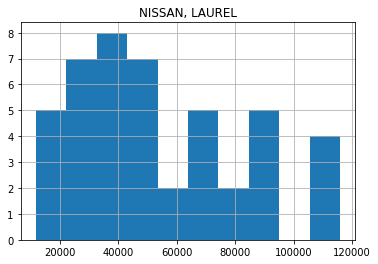

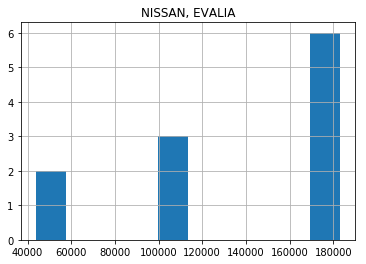

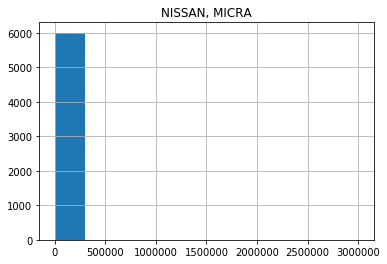

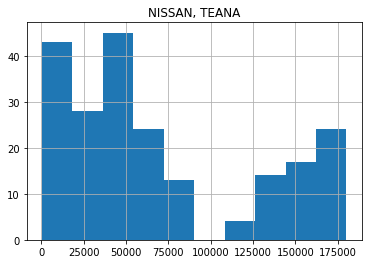

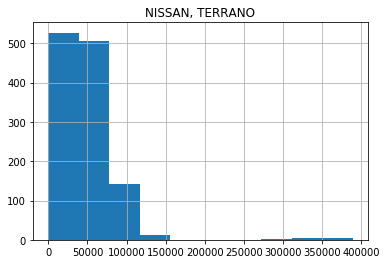

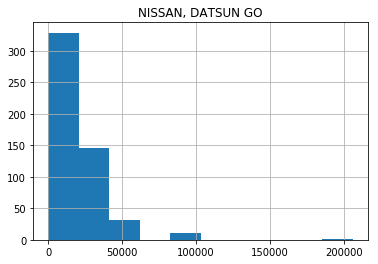

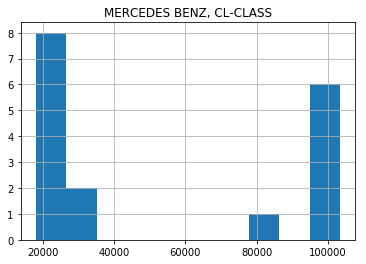

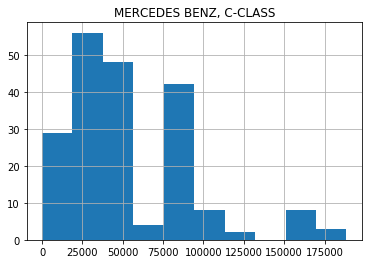

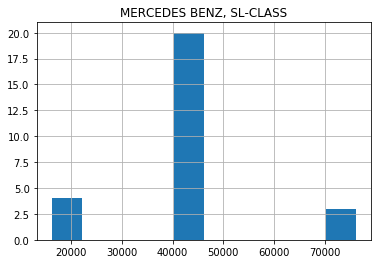

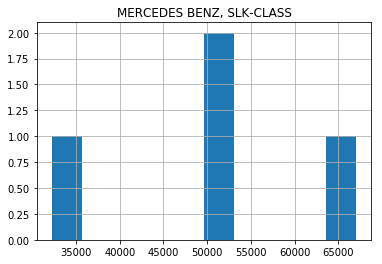

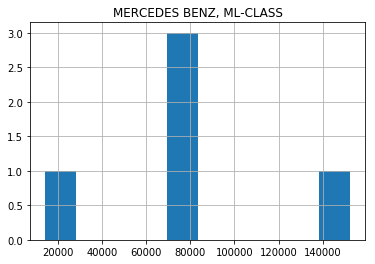

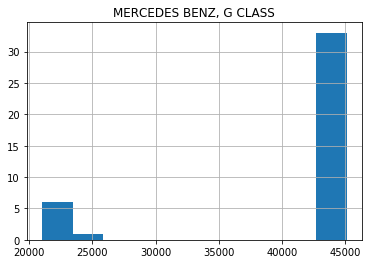

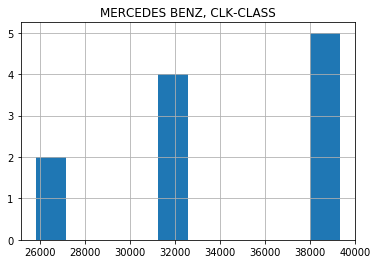

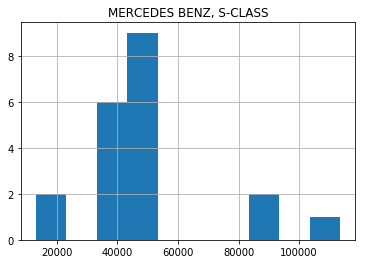

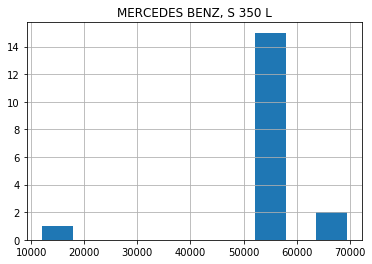

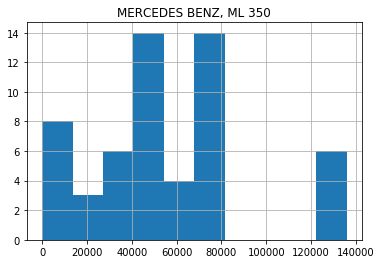

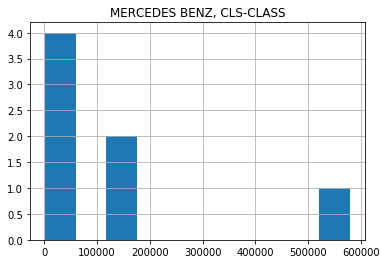

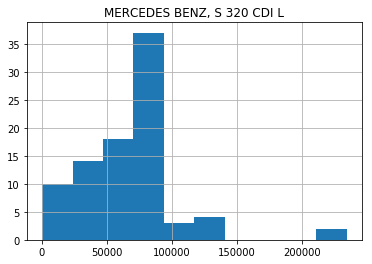

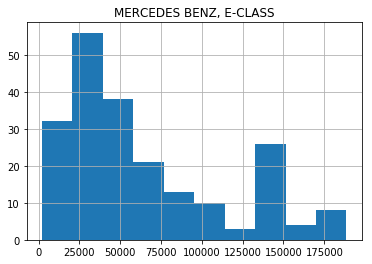

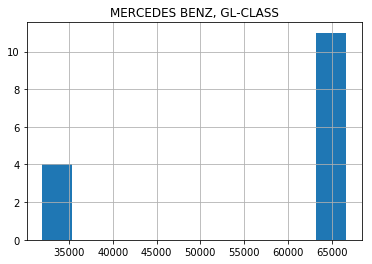

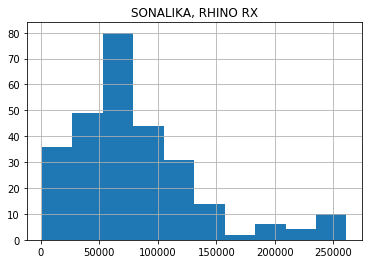

In [40]:
for make in make_model_dict.keys():
    tmp_lst = list(make_model_dict[make])
    for model in tmp_lst:
        ax = final_data[final_data['Model']==model]['KMs Reading'].hist()
        plt.title(make+", "+model)
        plt.show()

In [41]:
final_data['Regn No'].value_counts().sort_values(ascending=False)

AP02BD3581    1848
TN70A9898      466
MP41BC1187     464
TN31D9748      444
RJ19TA3750     436
AP9BU1561      422
AP09BH4419     366
MP41CA6241     356
MH04VA4701     347
TN34K7881      342
MH14DN0472     337
MH12GT3079     318
RJ07CB7963     317
HR10V8296      312
MH12DS3033     311
AP9AY3563      299
DL2CAG8443     299
MH14CK7885     295
MH14DN0473     292
MH14DA373      291
TN66F2961      285
MH15BN1506     285
MH15CM4258     279
MH15CM8451     278
TN04AE2427     277
MH04DN6210     274
TN45AR9078     274
TN09AU9924     272
TN66C9283      269
AP10BD9186     267
              ... 
HR34B7299        1
TN22CZ8277       1
UP32FI8932       1
KA109786         1
KA21N4038        1
TN01U2104        1
MP28C9616        1
TN52X6356        1
CH03X9969        1
TS16EH5656       1
UK18A9551        1
UP14BN5582       1
MH14DT6882       1
UP93Z6679        1
TN02S3445        1
MP19CB1804       1
RJ09UA1977       1
AP05CG1000       1
RJ11CA0498       1
MH04FA6138       1
MH04FZ8549       1
UP16AS5897  

In [42]:
#final_data['Item Category']!="P001" &
final_data[ (final_data['Item Category']!="P001")& (~final_data['Material'].str.contains("MISC"))].groupby(['Make','Model','Material','Item Category'])['Item Category'].count().sort_values(ascending=False)

Make                  Model         Material            Item Category
HYUNDAI               SANTRO        FFSOIL200901        P002             7885
MARUTI SUZUKI         ALTO          FFSOIL200901        P002             7600
HYUNDAI               I10           FFSOIL200901        P002             7181
MARUTI SUZUKI         SWIFT         FFSOIL200901        P002             7133
MAHINDRA &  MAHINDRA  SCORPIO CRDE  FFSOIL200901        P002             6114
MARUTI SUZUKI         WAGONR        FFSOIL200901        P002             6067
TATA MOTORS           INDICA        FFSOIL200901        P002             4340
MAHINDRA &  MAHINDRA  BOLERO        FFSOIL200901        P002             4037
MARUTI SUZUKI         SWIFT DZIRE   FFSOIL200901        P002             3635
HYUNDAI               SANTRO        1CSA2PI718900I99    P002             3619
MAHINDRA &  MAHINDRA  XYLO          FFSOIL200901        P002             3540
HYUNDAI               I10           1CSA2PI718900I99    P002            

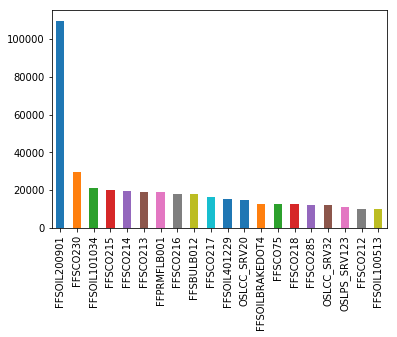

In [43]:
final_data[(final_data['Item Category']!="P001")& (~final_data['Material'].str.contains("MISC"))]['Material'].value_counts().head(20).plot(kind='bar')

In [44]:
len(final_data['Customer No.'].value_counts() > 1)

247189

In [45]:
invoice=pd.read_csv('data\\invoice_n.csv')
invoice.head()

,Unnamed: 0,Unnamed: 0.1,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CITY,Cash /Cashless Type,Cust Type,Customer No.,District,...,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,User ID
0,0,0,0.0,0.0,0.0,Thane,Unknown,Retail,67849,Maharashtra,...,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1
1,1,1,0.0,0.0,0.0,THNAE,Unknown,Retail,84419,Maharashtra,...,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2
2,2,2,0.0,0.0,0.0,THANE[W],Unknown,Retail,81055,Maharashtra,...,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2
3,3,3,0.0,0.0,0.0,THNAE,Unknown,Retail,84419,Maharashtra,...,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2
4,4,4,0.0,0.0,0.0,THANE,Unknown,Retail,18980,Maharashtra,...,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2


In [46]:
customer=pd.read_csv('data\\customer_n.csv')
customer.head()

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Business Partner,Customer No.,Partner Type,Data Origin,Title
0,0,31,1,1.0,Z001,5.0
1,1,32,2,1.0,Z005,5.0
2,2,34,4,1.0,Z005,5.0
3,3,35,5,1.0,Z005,5.0
4,4,42,7,1.0,Z008,5.0


In [47]:
customer_invoice = pd.DataFrame(pd.merge(customer, invoice, left_on='Customer No.', right_on='Customer No.',how='right'))
customer_invoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490774 entries, 0 to 490773
Data columns (total 40 columns):
Unnamed: 0_x            19703 non-null float64
Business Partner        19703 non-null object
Customer No.            490774 non-null object
Partner Type            19703 non-null float64
Data Origin             19703 non-null object
Title                   19703 non-null float64
Unnamed: 0_y            490774 non-null int64
Unnamed: 0.1            490774 non-null int64
Amt Rcvd From Custom    490774 non-null float64
Amt Rcvd From Ins Co    490774 non-null float64
Area / Locality         490774 non-null float64
CITY                    490774 non-null object
Cash /Cashless Type     490774 non-null object
Cust Type               490774 non-null object
District                490774 non-null object
Gate Pass Date          490774 non-null object
Gate Pass Time          490774 non-null object
Invoice Date            490774 non-null object
Invoice No              490774 non-null int6

In [48]:
len(customer_invoice['Customer No.'].value_counts() > 1)

252846

In [49]:
Cust_count=pd.DataFrame(customer_invoice['Customer No.'].value_counts())
Cust_count[Cust_count['Customer No.']>1]

,Customer No.
E4981,2666
E11206,688
412,610
14505,441
MFCWP01,353
221957,333
E1205,323
MFCCM03,251
MFM15,156
148721,145


In [50]:
cust_count1=Cust_count[Cust_count['Customer No.']>1]

In [131]:
print(len(cust_count1)/len(Cust_count) *100)

37.51888501301187


In [52]:
customer_invoice['Invoice Date'] =  pd.to_datetime(customer_invoice['Invoice Date'], infer_datetime_format=True)

In [53]:
#customer_ltv=pd.DataFrame(columns=['Customer No.','Years','Frquency','Mean_Amt','LTV'])
customer_ltv = pd.DataFrame()

In [54]:
set(invoice[invoice['Customer No.']=='412']['District'])

{'Andhra Pradesh'}

In [55]:
customer_ltv.head()

""


In [56]:
tmp_cust_max_date = customer_invoice.groupby(["Customer No."]).agg({'Invoice Date':'max'})[['Invoice Date']].reset_index()
tmp_cust_max_date = pd.merge(cust_count1,tmp_cust_max_date,left_on=cust_count1.index,right_on='Customer No.')

tmp_cust_max_date.drop(['Customer No._y'],axis=1,inplace=True)
tmp_cust_max_date.rename(columns={"Invoice Date":"max_date","Customer No._x":"count"},inplace=True)
#tmp_cust_max_date.head()

In [57]:
tmp_cust_min_date = customer_invoice.groupby(["Customer No."]).agg({'Invoice Date':'min','Total Amt Wtd Tax.':'mean'})[['Invoice Date','Total Amt Wtd Tax.']].reset_index()
tmp_cust_min_date = pd.merge(cust_count1,tmp_cust_min_date,left_on=cust_count1.index,right_on='Customer No.')

tmp_cust_min_date.drop(['Customer No._y'],axis=1,inplace=True)
tmp_cust_min_date.rename(columns={"Invoice Date":"min_date","Customer No._x":"count"},inplace=True)
tmp_cust_min_date.head()

,Customer No.,count,min_date,Total Amt Wtd Tax.
0,E4981,2666,2012-04-03,4446.108545
1,E11206,688,2014-09-26,2393.768939
2,412,610,2012-04-18,6231.555590
3,14505,441,2013-06-17,2986.098299
4,MFCWP01,353,2012-05-07,3250.280878


In [58]:
customer_ltv_raw=pd.merge(tmp_cust_max_date,tmp_cust_min_date)
customer_ltv_raw.head()

,Customer No.,count,max_date,min_date,Total Amt Wtd Tax.
0,E4981,2666,2016-09-13,2012-04-03,4446.108545
1,E11206,688,2016-10-20,2014-09-26,2393.768939
2,412,610,2016-08-12,2012-04-18,6231.555590
3,14505,441,2016-06-29,2013-06-17,2986.098299
4,MFCWP01,353,2016-06-18,2012-05-07,3250.280878


In [59]:
customer_ltv_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94865 entries, 0 to 94864
Data columns (total 5 columns):
Customer No.          94865 non-null object
count                 94865 non-null int64
max_date              94865 non-null datetime64[ns]
min_date              94865 non-null datetime64[ns]
Total Amt Wtd Tax.    94865 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.3+ MB


In [60]:
(customer_ltv_raw['max_date']-customer_ltv_raw['min_date']).dtype

dtype('<m8[ns]')

In [61]:
customer_ltv_raw['year']=((customer_ltv_raw['max_date']-customer_ltv_raw['min_date']))
customer_ltv_raw['year'] = customer_ltv_raw['year'] / np.timedelta64(365, 'D')
print(len(customer_ltv_raw[customer_ltv_raw['year'] == 0]))

customer_ltv_raw['year'].replace(0,1/365.0,inplace=True)

print(len(customer_ltv_raw[customer_ltv_raw['year'] == 0]))

customer_ltv_raw['ltv'] = (customer_ltv_raw['count'] / customer_ltv_raw['year'])*(customer_ltv_raw['Total Amt Wtd Tax.'])


#customer_ltv_raw['ltv']
pd.set_option('display.float_format', lambda x: '%.3f' % x)
customer_ltv_raw.head()


#print(customer_ltv_raw['year'].dtype)

4733
0


,Customer No.,count,max_date,min_date,Total Amt Wtd Tax.,year,ltv
0,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672
1,E11206,688,2016-10-20,2014-09-26,2393.769,2.068,796189.743
2,412,610,2016-08-12,2012-04-18,6231.556,4.321,879807.135
3,14505,441,2016-06-29,2013-06-17,2986.098,3.036,433806.239
4,MFCWP01,353,2016-06-18,2012-05-07,3250.281,4.118,278631.031


Text(0.5, 1.0, 'LTV per customer distribution')

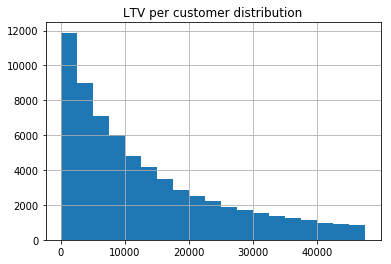

In [62]:
customer_ltv_raw['ltv'].describe()
bin_range = range(0,50000,2500)
customer_ltv_raw['ltv'].hist(bins=list(bin_range))
plt.title('LTV per customer distribution')

In [63]:
regn_count=pd.DataFrame(customer_invoice['Regn No'].value_counts())
print(len(set(customer_invoice['Regn No'])))
print(len(regn_count[regn_count['Regn No']>1]))

259665
96491


In [64]:
regn_count1=regn_count[regn_count['Regn No']>1]

In [65]:
regn_count

,Regn No
RJ14CE9887,56
HR51AV2841,53
MH04DN6210,52
PB29P0009,51
PB29M4006,49
MH15DC9103,43
PB29L0244,41
PB29P3344,38
PB10DU4839,38
MH02CW4881,38


In [66]:
tmp_regn_max_date = customer_invoice.groupby(["Regn No"]).agg({'Invoice Date':'max'})[['Invoice Date']].reset_index()
tmp_regn_max_date = pd.merge(regn_count1,tmp_regn_max_date,left_on=regn_count1.index,right_on='Regn No')

tmp_regn_max_date.drop(['Regn No_y'],axis=1,inplace=True)
tmp_regn_max_date.rename(columns={"Invoice Date":"max_date","Regn No_x":"count"},inplace=True)
tmp_regn_max_date

,Regn No,count,max_date
0,RJ14CE9887,56,2016-08-19
1,HR51AV2841,53,2016-02-15
2,MH04DN6210,52,2015-07-15
3,PB29P0009,51,2016-10-25
4,PB29M4006,49,2016-10-29
5,MH15DC9103,43,2015-05-30
6,PB29L0244,41,2016-10-22
7,PB29P3344,38,2016-10-04
8,PB10DU4839,38,2015-11-10
9,MH02CW4881,38,2016-02-29


In [67]:
tmp_regn_min_date = customer_invoice.groupby(["Regn No"]).agg({'Invoice Date':'min','Total Amt Wtd Tax.':'mean'})[['Invoice Date','Total Amt Wtd Tax.']].reset_index()
tmp_regn_min_date = pd.merge(regn_count1,tmp_regn_min_date,left_on=regn_count1.index,right_on='Regn No')

tmp_regn_min_date.drop(['Regn No_y'],axis=1,inplace=True)
tmp_regn_min_date.rename(columns={"Invoice Date":"min_date","Regn No_x":"count"},inplace=True)
tmp_regn_min_date.head()

,Regn No,count,min_date,Total Amt Wtd Tax.
0,RJ14CE9887,56,2013-08-07,1230.077
1,HR51AV2841,53,2014-03-23,642.645
2,MH04DN6210,52,2012-04-02,3688.410
3,PB29P0009,51,2014-10-21,1203.563
4,PB29M4006,49,2014-11-19,1201.976


In [68]:
regn_ltv_raw=pd.merge(tmp_regn_max_date,tmp_regn_min_date)
regn_ltv_raw.head()

,Regn No,count,max_date,min_date,Total Amt Wtd Tax.
0,RJ14CE9887,56,2016-08-19,2013-08-07,1230.077
1,HR51AV2841,53,2016-02-15,2014-03-23,642.645
2,MH04DN6210,52,2015-07-15,2012-04-02,3688.410
3,PB29P0009,51,2016-10-25,2014-10-21,1203.563
4,PB29M4006,49,2016-10-29,2014-11-19,1201.976


In [69]:
regn_ltv_raw['year']=((regn_ltv_raw['max_date']-regn_ltv_raw['min_date']))
regn_ltv_raw['year'] = regn_ltv_raw['year'] / np.timedelta64(365, 'D')
print(len(regn_ltv_raw[regn_ltv_raw['year'] == 0]))

regn_ltv_raw['year'].replace(0,1/365.0,inplace=True)

print(len(regn_ltv_raw[regn_ltv_raw['year'] == 0]))

regn_ltv_raw['ltv'] = (regn_ltv_raw['count'] / regn_ltv_raw['year'])*(regn_ltv_raw['Total Amt Wtd Tax.'])


#regn_ltv_raw['ltv']
pd.set_option('display.float_format', lambda x: '%.3f' % x)
regn_ltv_raw.head()

4739
0


,Regn No,count,max_date,min_date,Total Amt Wtd Tax.,year,ltv
0,RJ14CE9887,56,2016-08-19,2013-08-07,1230.077,3.036,22692.030
1,HR51AV2841,53,2016-02-15,2014-03-23,642.645,1.901,17913.495
2,MH04DN6210,52,2015-07-15,2012-04-02,3688.410,3.285,58387.007
3,PB29P0009,51,2016-10-25,2014-10-21,1203.563,2.014,30482.079
4,PB29M4006,49,2016-10-29,2014-11-19,1201.976,1.945,30277.938


Text(0.5, 1.0, 'LTV per Regn No distribution')

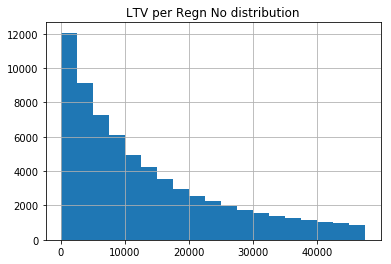

In [70]:
regn_ltv_raw['ltv'].describe()
bin_range = range(0,50000,2500)
regn_ltv_raw['ltv'].hist(bins=list(bin_range))
plt.title('LTV per Regn No distribution')

In [71]:
regn_ltv=pd.merge(customer_invoice,regn_ltv_raw,left_on='Regn No', right_on='Regn No')
regn_ltv.head()

,Unnamed: 0_x,Business Partner,Customer No.,Partner Type,Data Origin,Title,Unnamed: 0_y,Unnamed: 0.1,Amt Rcvd From Custom,Amt Rcvd From Ins Co,...,Regn No,Technician Name,Total Amt Wtd Tax._x,User ID,count,max_date,min_date,Total Amt Wtd Tax._y,year,ltv
0,551479.000,CS000018,CS000018,1.000,Z005,5.000,352152,787293,0.000,0.000,...,TN19Q2153,Unknown,49.750,BC07SA2,2,2016-04-28,2016-04-25,3713.935,0.008,903724.183
1,555289.000,MFCCM14,MFCCM14,2.000,Z005,5.000,348014,783155,0.000,0.000,...,TN19Q2153,Unknown,7378.120,BC07SA2,2,2016-04-28,2016-04-25,3713.935,0.008,903724.183
2,551481.000,E10013,E10013,1.000,Z001,5.000,290030,725171,0.000,0.000,...,AP28AS8746,suresh,1001.290,BC04FS1,2,2013-12-14,2013-12-14,500.645,0.003,365470.850
3,551481.000,E10013,E10013,1.000,Z001,5.000,290221,725362,0.000,0.000,...,AP28AS8746,suresh,0.000,BC04FS1,2,2013-12-14,2013-12-14,500.645,0.003,365470.850
4,551484.000,E10023,E10023,1.000,Z001,5.000,101261,101261,0.000,0.000,...,TN07BB9491,sdfhghgh,149.390,BC07SA2,2,2015-11-23,2012-08-17,1399.810,3.268,856.548


In [72]:
regn_ltv_1= regn_ltv[['Regn No','count','ltv','Make','Model','District']].copy()
regn_ltv_1.head()

,Regn No,count,ltv,Make,Model,District
0,TN19Q2153,2,903724.183,HONDA,MOBILIO,Tamil Nadu
1,TN19Q2153,2,903724.183,HONDA,MOBILIO,Tamil Nadu
2,AP28AS8746,2,365470.850,MARUTI SUZUKI,WAGONR,Andhra Pradesh
3,AP28AS8746,2,365470.850,MARUTI SUZUKI,WAGONR,Andhra Pradesh
4,TN07BB9491,2,856.548,HYUNDAI,SANTRO,Andhra Pradesh


In [73]:
len(set(regn_ltv_1['Regn No']))

96491

In [74]:
regn_ltv_1.drop_duplicates(keep = 'first', inplace = True) 

In [75]:
regn_ltv_1.head()

,Regn No,count,ltv,Make,Model,District
0,TN19Q2153,2,903724.183,HONDA,MOBILIO,Tamil Nadu
2,AP28AS8746,2,365470.850,MARUTI SUZUKI,WAGONR,Andhra Pradesh
4,TN07BB9491,2,856.548,HYUNDAI,SANTRO,Andhra Pradesh
6,AP13N9876,4,5084.434,MARUTI SUZUKI,WAGONR,Andhra Pradesh
10,TN01AJ6436,3,6995.384,HYUNDAI,SANTRO,Tamil Nadu


In [80]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [78]:
regn_ltv_clust= regn_ltv_1[['count','ltv','Make','Model','District']].copy()
regn_ltv_clust.head()

,count,ltv,Make,Model,District
0,2,903724.183,HONDA,MOBILIO,Tamil Nadu
2,2,365470.850,MARUTI SUZUKI,WAGONR,Andhra Pradesh
4,2,856.548,HYUNDAI,SANTRO,Andhra Pradesh
6,4,5084.434,MARUTI SUZUKI,WAGONR,Andhra Pradesh
10,3,6995.384,HYUNDAI,SANTRO,Tamil Nadu


In [82]:
regn_ltv_clust['Make']= label_encoder.fit_transform(regn_ltv_clust['Make']) 
regn_ltv_clust.head()

,count,ltv,Make,Model,District
0,2,903724.183,8,MOBILIO,Tamil Nadu
2,2,365470.850,13,WAGONR,Andhra Pradesh
4,2,856.548,9,SANTRO,Andhra Pradesh
6,4,5084.434,13,WAGONR,Andhra Pradesh
10,3,6995.384,9,SANTRO,Tamil Nadu


In [83]:
regn_ltv_clust['Model']= label_encoder.fit_transform(regn_ltv_clust['Model']) 
regn_ltv_clust['District']= label_encoder.fit_transform(regn_ltv_clust['District']) 
regn_ltv_clust.head()

,count,ltv,Make,Model,District
0,2,903724.183,8,121,28
2,2,365470.850,13,203,1
4,2,856.548,9,159,1
6,4,5084.434,13,203,1
10,3,6995.384,9,159,28


In [76]:
from sklearn.cluster import KMeans

[[3.44174593e+00 1.44039397e+05 1.29210421e+01 1.17256584e+02
  2.00323082e+01]
 [2.05586592e+00 2.84079218e+07 1.39720670e+01 1.14720670e+02
  2.03743017e+01]
 [2.09511344e+00 6.95441412e+06 1.28830716e+01 1.17143106e+02
  1.94166667e+01]]


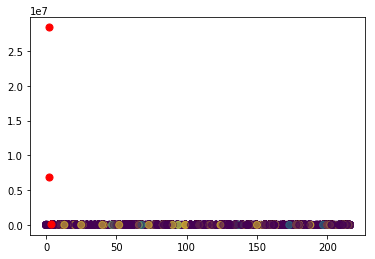

In [94]:
kmeans = KMeans(n_clusters=3).fit(regn_ltv_clust)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(regn_ltv_clust['Model'], regn_ltv_clust['count'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [96]:
customer_ltv_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94865 entries, 0 to 94864
Data columns (total 7 columns):
Customer No.          94865 non-null object
count                 94865 non-null int64
max_date              94865 non-null datetime64[ns]
min_date              94865 non-null datetime64[ns]
Total Amt Wtd Tax.    94865 non-null float64
year                  94865 non-null float64
ltv                   94865 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 5.8+ MB


In [97]:
customer_ltv=pd.merge(customer_ltv_raw,invoice,left_on='Customer No.',right_on='Customer No.')
customer_ltv.head()

,Customer No.,count,max_date,min_date,Total Amt Wtd Tax._x,year,ltv,Unnamed: 0,Unnamed: 0.1,Amt Rcvd From Custom,...,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax._y,User ID
0,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672,9959,9959,0.000,...,0.000,600032,BC06,GUINDY,NO,0.000,TN147023,RAMESH,49.820,BC06SA1
1,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672,10036,10036,0.000,...,0.000,600032,BC06,GUINDY,NO,0.000,TN02AX5857,karthick,162.860,BC06SA2
2,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672,10037,10037,0.000,...,0.000,600032,BC06,GUINDY,NO,0.000,TN05AZ2455,KARTHICK.,162.860,BC06SA2
3,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672,10044,10044,0.000,...,0.000,600032,BC06,GUINDY,NO,0.000,TN05AZ3276,KARTHICK,162.860,BC06SA2
4,E4981,2666,2016-09-13,2012-04-03,4446.109,4.449,2664078.672,10045,10045,0.000,...,0.000,600032,BC06,GUINDY,NO,0.000,TN09BX2963,karthick,162.830,BC06SA2


In [98]:
customer_ltv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332793 entries, 0 to 332792
Data columns (total 41 columns):
Customer No.            332793 non-null object
count                   332793 non-null int64
max_date                332793 non-null datetime64[ns]
min_date                332793 non-null datetime64[ns]
Total Amt Wtd Tax._x    332793 non-null float64
year                    332793 non-null float64
ltv                     332793 non-null float64
Unnamed: 0              332793 non-null int64
Unnamed: 0.1            332793 non-null int64
Amt Rcvd From Custom    332793 non-null float64
Amt Rcvd From Ins Co    332793 non-null float64
Area / Locality         332793 non-null float64
CITY                    332793 non-null object
Cash /Cashless Type     332793 non-null object
Cust Type               332793 non-null object
District                332793 non-null object
Gate Pass Date          332793 non-null object
Gate Pass Time          332793 non-null object
Invoice Date            

In [99]:
customer_ltv_final=customer_ltv[['count','ltv','Make','Model','CITY','Order Type']].copy()
customer_ltv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332793 entries, 0 to 332792
Data columns (total 6 columns):
count         332793 non-null int64
ltv           332793 non-null float64
Make          332793 non-null object
Model         332793 non-null object
CITY          332793 non-null object
Order Type    332793 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 17.8+ MB


In [100]:
customer_ltv_final.drop_duplicates(keep = 'first', inplace = True) 
customer_ltv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185261 entries, 0 to 332792
Data columns (total 6 columns):
count         185261 non-null int64
ltv           185261 non-null float64
Make          185261 non-null object
Model         185261 non-null object
CITY          185261 non-null object
Order Type    185261 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [103]:
customer_ltv_final.head()

,count,ltv,Make,Model,CITY,Order Type
0,2666,2664078.672,24,92,2084,2
1,2666,2664078.672,24,92,2084,4
2,2666,2664078.672,24,91,2084,4
4,2666,2664078.672,25,69,2084,4
9,2666,2664078.672,25,95,2084,4


In [102]:
customer_ltv_final['Make']= label_encoder.fit_transform(customer_ltv_final['Make']) 
customer_ltv_final['Model']= label_encoder.fit_transform(customer_ltv_final['Model']) 
customer_ltv_final['CITY']= label_encoder.fit_transform(customer_ltv_final['CITY']) 
customer_ltv_final['Order Type']= label_encoder.fit_transform(customer_ltv_final['Order Type']) 

In [117]:

customer_ltv_final.to_csv("data\\customer_ltv_final.csv"); 

In [107]:
X=customer_ltv_final[['count','Order Type','Make','Model','CITY']].copy()
y=customer_ltv_final[['ltv']].copy()

In [110]:
Xtrain

,count,Order Type,Make,Model,CITY
41965,10,0,12,113,4181
329719,2,4,9,10,1674
175437,4,2,12,27,2274
217144,3,2,12,114,5124
230773,3,4,24,94,1091
92065,6,1,12,219,7523
107346,5,2,12,167,2287
160475,4,6,26,144,4222
330419,2,4,22,71,6979
282182,2,4,13,155,3570


In [115]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(ytrain)
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(Xtrain,training_scores_encoded)
y_pred=rm.predict(tfv.transform(X_test))
print(classification_report(y_test,y_pred))


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MemoryError: could not allocate 20763639808 bytes

In [124]:
df_3=pd.DataFrame(invoice[invoice['Order Type']=='Accidental'].groupby(['CITY'])['Order Type'].count().sort_values(ascending=False))
df_3

,Order Type
CITY,
CHENNAI,3983
BANGALORE,1438
PUNE,1420
HYDERABAD,1386
NASHIK,1169
COIMBATORE,1134
MOGA,706
NELLORE,700
NAGPUR,661


In [125]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490774 entries, 0 to 490773
Data columns (total 35 columns):
Unnamed: 0              490774 non-null int64
Unnamed: 0.1            490774 non-null int64
Amt Rcvd From Custom    490774 non-null float64
Amt Rcvd From Ins Co    490774 non-null float64
Area / Locality         490774 non-null float64
CITY                    490774 non-null object
Cash /Cashless Type     490774 non-null object
Cust Type               490774 non-null object
Customer No.            490774 non-null object
District                490774 non-null object
Gate Pass Date          490774 non-null object
Gate Pass Time          490774 non-null object
Invoice Date            490774 non-null object
Invoice No              490774 non-null int64
Invoice Time            490774 non-null object
Job Card No             490774 non-null int64
JobCard Date            490774 non-null object
JobCard Time            490774 non-null object
KMs Reading             490774 non-null int6

In [127]:
invoice['JobCard Date'] =  pd.to_datetime(invoice['JobCard Date'], infer_datetime_format=True)

In [138]:
customer_ltv_raw['ltv'].min()

0.0